In [188]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy import constants as const
from astropy.modeling import models
from matplotlib.ticker import LogFormatter
import scipy 

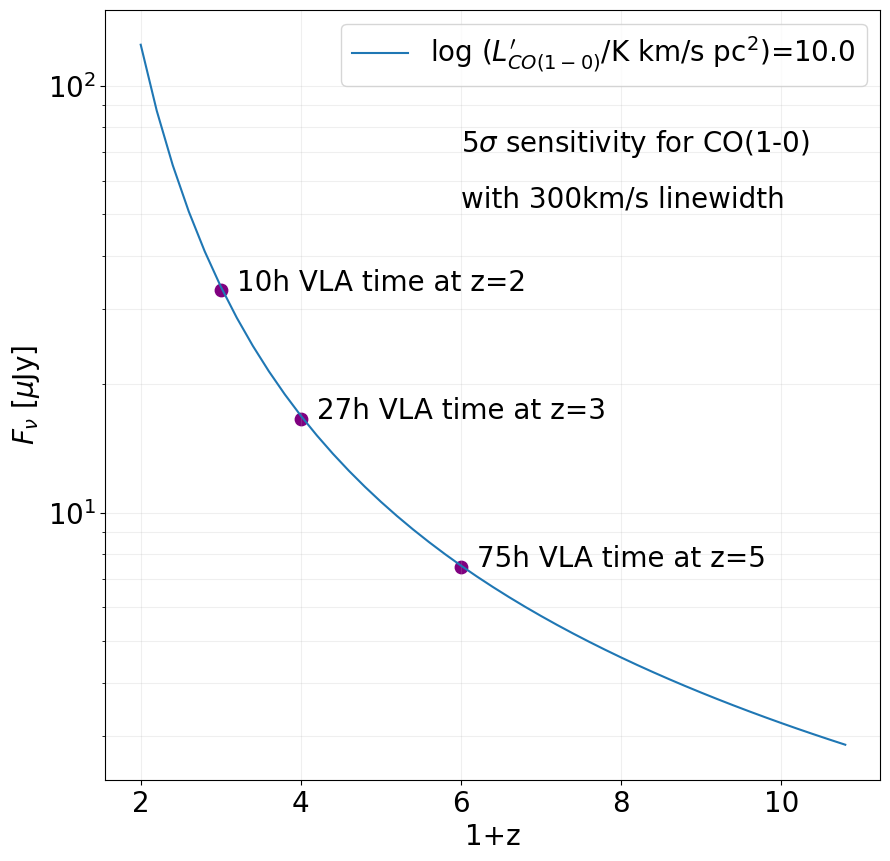

In [229]:
redshift=np.arange(1.0,10.0,0.2)
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(redshift)
#
Lcop=10**(10.0)
nu=115.2712
Sdv=[]
Wm2=[]
fig,ax=plt.subplots(figsize=(10,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
for i, myz in enumerate(redshift):
    value=Lcop/(3.25e7)/(dL[i].value*dL[i].value)*(1+myz)*(nu**2)
    Sdv.append(value)
    Wm2.append(value*1.91e-18/(1+myz))    

plt.xlabel(r'1+z',fontsize=20)
#plt.ylabel(r'$S\Delta v$ [Jy km/s]',fontsize=20)
plt.ylabel(r'$F_\nu$ [$\mu$Jy]',fontsize=20)
plt.plot(redshift+1, 1e6*np.array(Sdv)/300.0/5.0, label=r'log ($L_{CO(1-0)}^{\prime}$/K km/s pc$^2$)='+str(np.log10(Lcop)))
#plt.axhline(1.9e-19,color='black',linewidth=3,alpha=0.3)
plt.legend(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.scatter(4,10*1.66,marker='o',color='purple',s=80)
plt.scatter(6,4.5*1.66,marker='o',color='purple',s=80)
plt.scatter(3,20*1.66,marker='o',color='purple',s=80)
plt.yscale('log')
plt.annotate(xy=(6,70),text=r'$5\sigma$ sensitivity for CO(1-0)',fontsize=20)
plt.annotate(xy=(6,52),text=r'with 300km/s linewidth',fontsize=20)

plt.annotate(xy=(3.2,20*1.66),text='10h VLA time at z=2',fontsize=20)
plt.annotate(xy=(4.2,10*1.66),text='27h VLA time at z=3',fontsize=20)
plt.annotate(xy=(6.2,4.5*1.66),text='75h VLA time at z=5',fontsize=20)
plt.savefig('VLA_sensitivity_v300.png',dpi=600)

In [32]:
# read JWST MIRI sensitivity curve
# repository of the sensitivity curve 
# https://github.com/spacetelescope/pandeia-verification/tree/master/tests/miri
data=np.load('miri_mrs_sensitivity.npz',allow_pickle=True)

In [33]:
#JWST sensitivity in mJy
wave_jwst=data['wavelengths']
flux_jwst=data['lim_fluxes']
sensi_jwst=flux_jwst/2*np.sqrt(10000.0/3600.0)

In [34]:
#Convert the PRIMA FIRESS low-res sensitivity (1.9e-19 W/m^2) to mJy
cspeed=2.99792458e10
wave1=np.linspace(24,42,100)
delnu1=cspeed/(wave1/1e4)/(wave1/1e4)*(0.23/1e4)
nu1=cspeed/(wave1/1e4)
wave2=np.linspace(42,75,100)
delnu2=cspeed/(wave2/1e4)/(wave2/1e4)*(0.41/1e4)
wave3=np.linspace(75,132,100)
delnu3=cspeed/(wave3/1e4)/(wave3/1e4)*(0.73/1e4)
wave4=np.linspace(132,235,100)
delnu4=cspeed/(wave4/1e4)/(wave4/1e4)*(1.29/1e4)
#sensi1=1e3*1.9e-19/(nu1**2/cspeed*0.23/1e4)/(1e-26) #mJy
sensi1=1e3*1.9e-19/delnu1/(1e-26) #mJy
sensi2=1e3*1.9e-19/delnu2/(1e-26) #mJy
sensi3=1e3*1.9e-19/delnu3/(1e-26) #mJy
sensi4=1e3*1.9e-19/delnu4/(1e-26) #mJy
wave_prima=list(wave1)+list(wave2)+list(wave3)+list(wave4)
sensi_prima=list(sensi1)+list(sensi2)+list(sensi3)+list(sensi4)

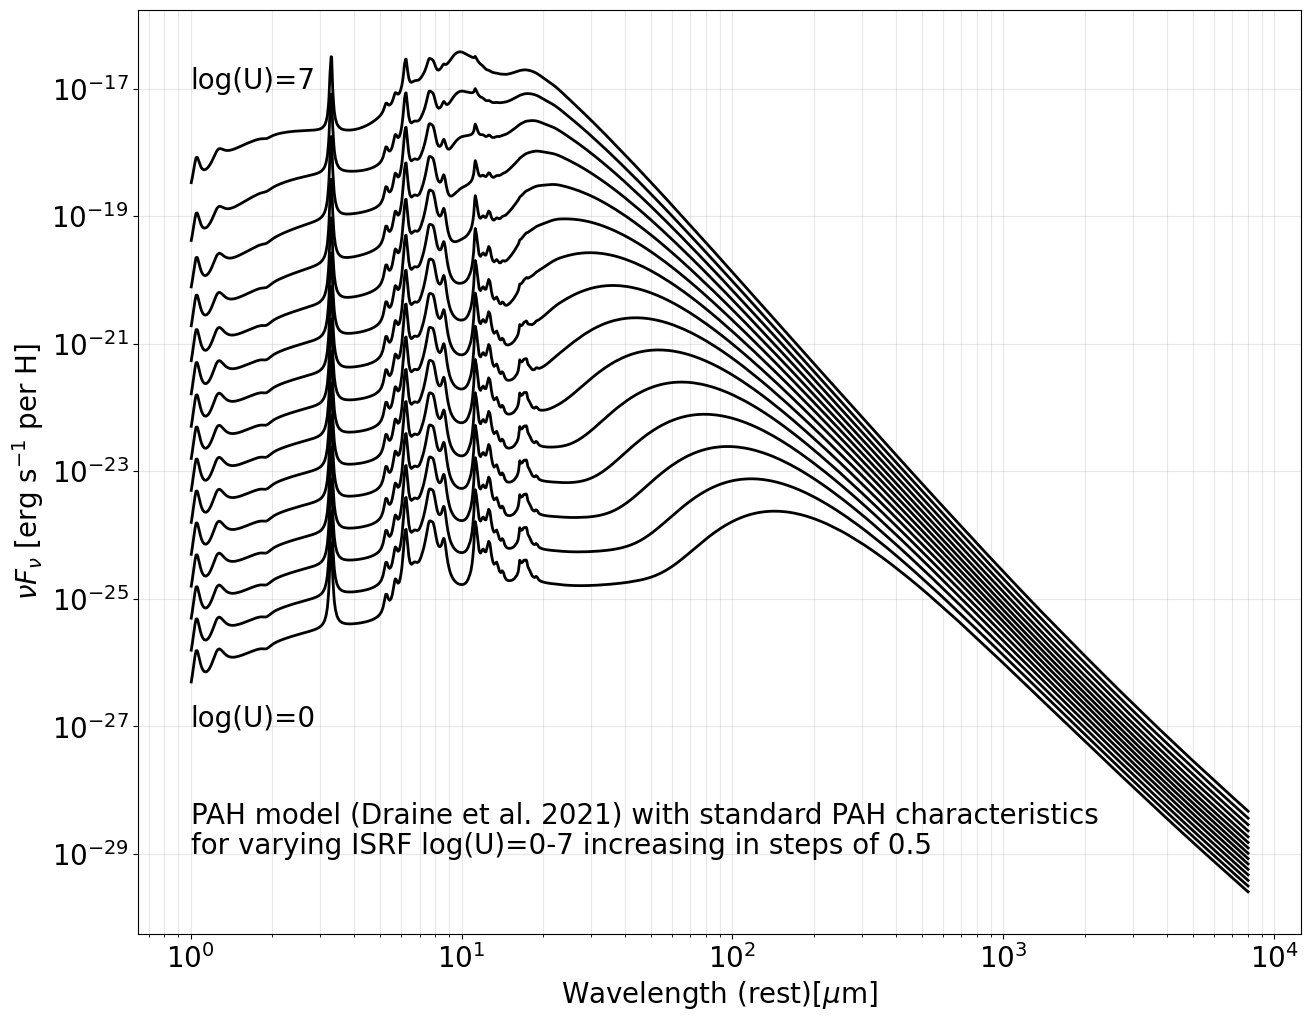

In [35]:
#creating Figure 2a
files=['pahspec.out_mmpisrf_0.00_st_std',
       'pahspec.out_mmpisrf_0.50_st_std',
       'pahspec.out_mmpisrf_1.00_st_std',
       'pahspec.out_mmpisrf_1.50_st_std',
       'pahspec.out_mmpisrf_2.00_st_std',
       'pahspec.out_mmpisrf_2.50_st_std',
       'pahspec.out_mmpisrf_3.00_st_std',
       'pahspec.out_mmpisrf_3.50_st_std',
       'pahspec.out_mmpisrf_4.00_st_std',
       'pahspec.out_mmpisrf_4.50_st_std',
       'pahspec.out_mmpisrf_5.00_st_std',
       'pahspec.out_mmpisrf_5.50_st_std',
       'pahspec.out_mmpisrf_6.00_st_std',
       'pahspec.out_mmpisrf_6.50_st_std',
       'pahspec.out_mmpisrf_7.00_st_std']
fig,ax=plt.subplots(figsize=(15,12))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Wavelength (rest)'+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'$\nu F_{\nu}$ '+r'[erg s$^{-1}$ per H]',fontsize=20)
plt.annotate(xy=(1,3e-29),text='PAH model (Draine et al. 2021) with standard PAH characteristics',fontsize=20)
plt.annotate(xy=(1,1e-29),text='for varying ISRF log(U)=0-7 increasing in steps of 0.5',fontsize=20)
plt.annotate(xy=(1,1e-17),text='log(U)=7',fontsize=20)
plt.annotate(xy=(1,1e-27),text='log(U)=0',fontsize=20)
for i, file in enumerate(files):
    Lir_data=np.loadtxt(file, dtype=str,skiprows=4, max_rows=1)
    LTIR=float(Lir_data[0])
    wave,jpah=loadtxt(file, unpack=True, usecols=(0,1),skiprows=7) #jpah [erg/s per H]
    plt.plot(wave,jpah,linewidth=2,color='black')
plt.grid(alpha=0.3, which='both')
plt.savefig('PAH_emissivity.png',dpi=600)

In [51]:
filesU0=['U1.00_1.00_MW3.1_00.txt',
       'U1.00_1.00_MW3.1_10.txt',
       'U1.00_1.00_MW3.1_20.txt',
       'U1.00_1.00_MW3.1_30.txt',
       'U1.00_1.00_MW3.1_40.txt',
       'U1.00_1.00_MW3.1_50.txt',
       'U1.00_1.00_MW3.1_60.txt']
filesU1=['U10.0_10.0_MW3.1_00.txt',
       'U10.0_10.0_MW3.1_10.txt',
       'U10.0_10.0_MW3.1_20.txt',
       'U10.0_10.0_MW3.1_30.txt',
       'U10.0_10.0_MW3.1_40.txt',
       'U10.0_10.0_MW3.1_50.txt',
       'U10.0_10.0_MW3.1_60.txt']
filesU2=['U1e2_1e2_MW3.1_00.txt',
       'U1e2_1e2_MW3.1_10.txt',
       'U1e2_1e2_MW3.1_20.txt',
       'U1e2_1e2_MW3.1_30.txt',
       'U1e2_1e2_MW3.1_40.txt',
       'U1e2_1e2_MW3.1_50.txt',
       'U1e2_1e2_MW3.1_60.txt']
filesU3=['U1e3_1e3_MW3.1_00.txt',
       'U1e3_1e3_MW3.1_10.txt',
       'U1e3_1e3_MW3.1_20.txt',
       'U1e3_1e3_MW3.1_30.txt',
       'U1e3_1e3_MW3.1_40.txt',
       'U1e3_1e3_MW3.1_50.txt',
       'U1e3_1e3_MW3.1_60.txt']
filesU4=['U1e4_1e4_MW3.1_00.txt',
       'U1e4_1e4_MW3.1_10.txt',
       'U1e4_1e4_MW3.1_20.txt',
       'U1e4_1e4_MW3.1_30.txt',
       'U1e4_1e4_MW3.1_40.txt',
       'U1e4_1e4_MW3.1_50.txt',
       'U1e4_1e4_MW3.1_60.txt']
filesU5=['U1e5_1e5_MW3.1_00.txt',
       'U1e5_1e5_MW3.1_10.txt',
       'U1e5_1e5_MW3.1_20.txt',
       'U1e5_1e5_MW3.1_30.txt',
       'U1e5_1e5_MW3.1_40.txt',
       'U1e5_1e5_MW3.1_50.txt',
       'U1e5_1e5_MW3.1_60.txt']
filesU6=['U3e5_3e5_MW3.1_00.txt',
       'U3e5_3e5_MW3.1_10.txt',
       'U3e5_3e5_MW3.1_20.txt',
       'U3e5_3e5_MW3.1_30.txt',
       'U3e5_3e5_MW3.1_40.txt',
       'U3e5_3e5_MW3.1_50.txt',
       'U3e5_3e5_MW3.1_60.txt']
uval_qpah=np.array([1.0,10.0,1e2,1e3,1e4,1e5,3e5])
filelist=[filesU0,filesU1,filesU2,filesU3,filesU4,filesU5,filesU6]

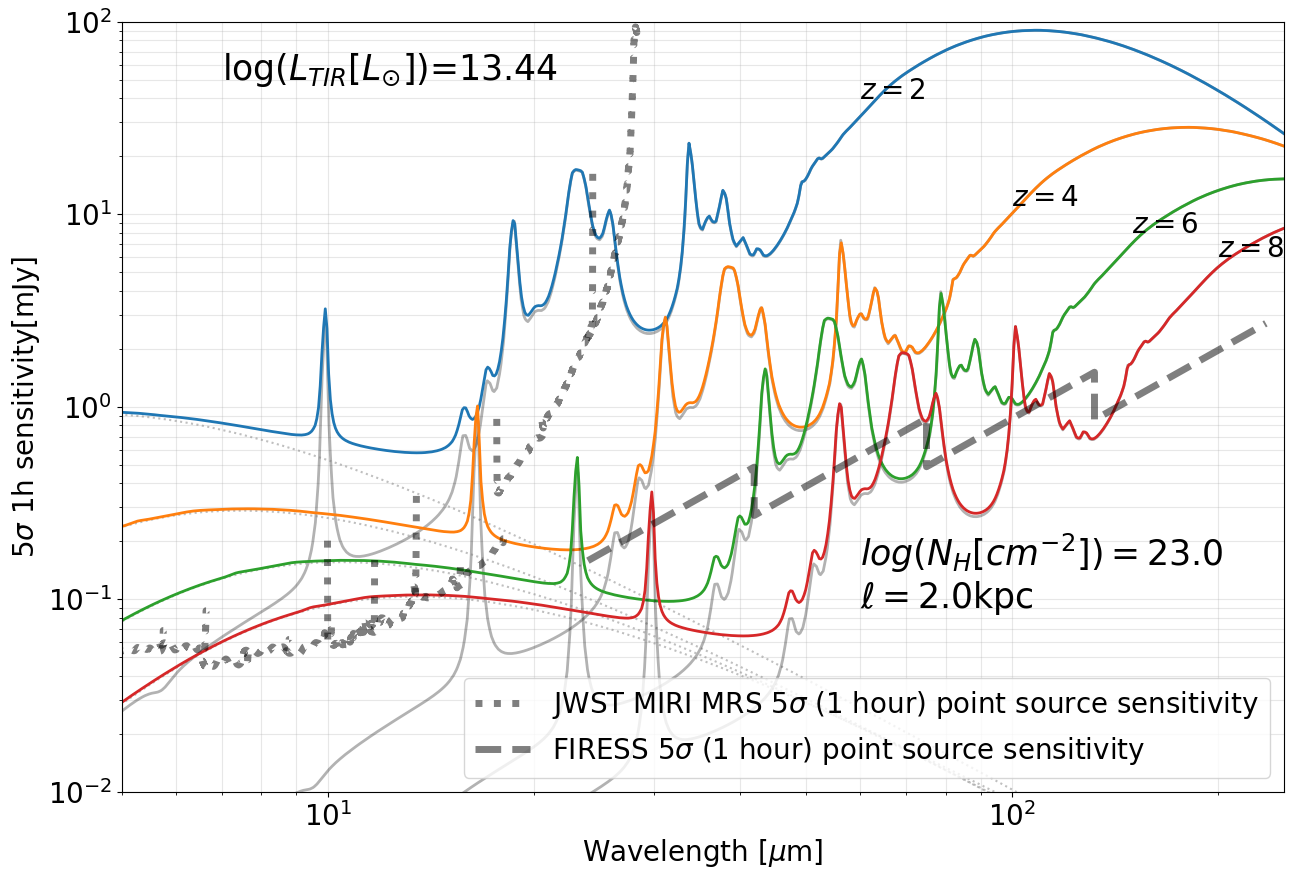

In [36]:
#Creating Figure 2b
#reading stellar SED file
filename='isrf_mmpisrf_0.00'
swave,sflux=np.loadtxt(filename, unpack=True, usecols=(0,1),skiprows=7)

Ncol=10**(23.0)
size=2.0 #kpc

redshift=np.arange(2.0,10.0,2.0)
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(redshift)
#This file is for logU=4
filename='pahspec.out_mmpisrf_4.00_st_std'
logU=4
Lir_data=np.loadtxt(filename, dtype=str,skiprows=4, max_rows=1)
LTIR=float(Lir_data[0])
LTIR=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR*Ncol)/(3.8e33)
LTIR=np.log10(LTIR)
#scale=cosmo.kpc_proper_per_arcmin(redshift)
waver,jpah=loadtxt(filename, unpack=True, usecols=(0,1),skiprows=7) #jpah [erg/s per H]
#
Ncol=10**(23.0)
size=2.0 #kpc
####
fig,ax=plt.subplots(figsize=(15,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,250)
plt.ylim(1e-2,1e2)
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'$5\sigma$ 1h sensitivity'+'[mJy]',fontsize=20)
plt.grid(which='both',alpha=0.3)

#plot SED

for i, myz in enumerate(redshift):
    wave,jpah=np.loadtxt(filename, unpack=True, usecols=(0,1),skiprows=7) #jpah [erg/s per H]
    wave=wave*(1+myz)
    flux=np.pi/4.0*size**2/(4*np.pi*dL[i].value*dL[i].value*1e6)*Ncol*jpah  #erg/s/cm^2
    #flux_watt_per_meter2_perHz=flux*1e3/(cspeed/(wave/1e4)) #now W/m^2/Hz
    flux_watt_per_meter2=flux/1e3
    flux_Jy=flux/(cspeed/(wave/1e4))/(1e-23) #now Jy

    # stellar SED
    # Uv=4pi/c Jv where Uv[erg/cm^3/Hz]. Therefore using shell geometry, Uv x c x 4pi (l/2)^2 [erg/s/Hz]
    sflux_Jy=sflux*(np.pi*(size*1e3*3.085e18)**2)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(4*np.pi*(dL[i].value*1e6*3.085e18)**2)*(10**logU)
    sflux_Jy=sflux_Jy/(1e-23)

    #interpolate
    wave_interp=np.logspace(0,2.47,num=1000)
    #print(wave_interp)
    flux1=np.interp(wave_interp,wave,flux_Jy)
    flux2=np.interp(wave_interp,swave*(1+myz),sflux_Jy)
    #print(flux2)
    totflux=flux1+flux2
    #
    plt.plot(wave,flux_Jy*1e3,linewidth=2,alpha=0.3,color='black')
    plt.plot(swave*(1+myz),sflux_Jy*1e3,color='gray',alpha=0.5,linestyle='dotted')
    plt.plot(wave_interp,totflux*1e3,linewidth=2)

for i in range(len(wave_jwst)):
    mywave=wave_jwst[i]
    myflux=sensi_jwst[i]
    if i==0:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
    else:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,zorder=5)

#plt.plot(wave_jwst,sensi_jwst,linewidth=3,linestyle='--',color='purple',label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity')
plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
#for i in range(4):
#    plt.step(wave,sensi_prima,linewidth=3,linestyle='-',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')

plt.annotate(xy=(7,50),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(LTIR,2)),fontsize=25)

plt.annotate(xy=(60,0.15),text=r'$log(N_H [cm^{-2}])=$'+str(np.log10(Ncol)),fontsize=25)
plt.annotate(xy=(60,0.09),text=r'$\ell=$'+str(size)+'kpc',fontsize=25) 
#plt.annotate(xy=(60,0.06),text=r'$F_{\nu}=\frac{\pi}{4}\ell^2 N_H (\frac{4\pi j_{\nu}}{n_H})/4\pi D_L^2$',fontsize=25)

plt.annotate(xy=(60,40),text=r'$z=2$',fontsize=20)
plt.annotate(xy=(100,11),text=r'$z=4$',fontsize=20)
plt.annotate(xy=(150,8),text=r'$z=6$',fontsize=20)
plt.annotate(xy=(200,6),text=r'$z=8$',fontsize=20)

plt.legend(loc=4,fontsize=20)
plt.savefig('sensitivity_zall.png',dpi=600)

In [41]:
import numpy as np
from scipy.stats import lognorm
from scipy.stats import norm
from scipy.stats import powerlaw
from scipy.stats import expon
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy import constants as const
from astropy.modeling import models
from matplotlib.ticker import LogFormatter

2.124832934892639 5.066487003273011
3.569279396692331


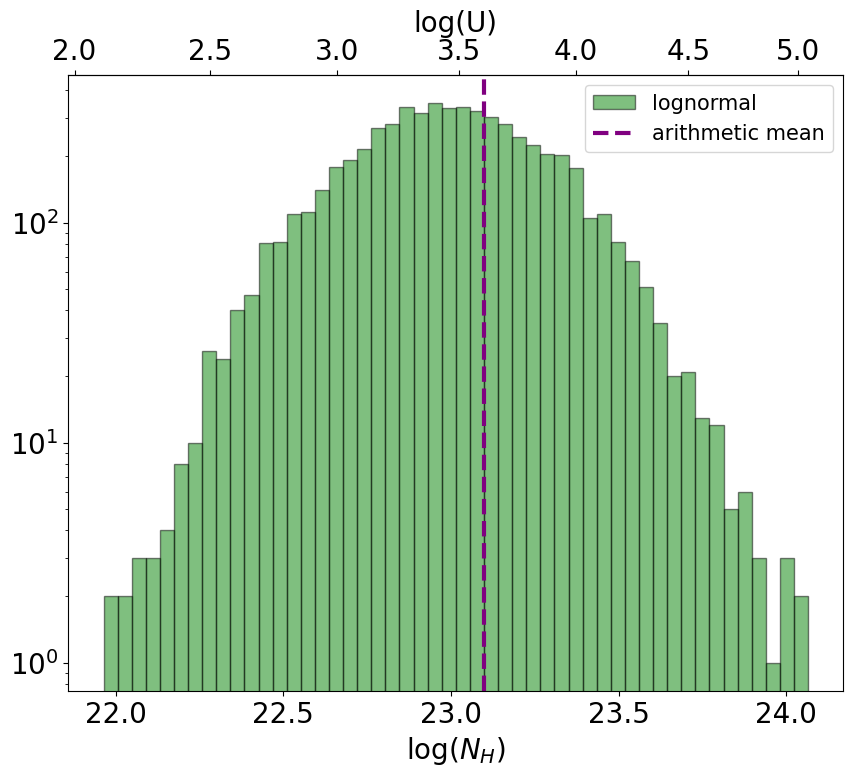

In [168]:
#creating Figure 3a
Z = expon(loc=0.0,scale=0.4)
z = Z.rvs(size=0)

X = norm(loc=0.0, scale=0.3*np.log(10.0))
x = X.rvs(size=6000)

#compute column density distribution
logNcol=23.0
lnNcol=(np.array(list(x)+list(z)))
lnNcol_avg=np.mean(np.array(list(x)+list(z)))
lnN0=logNcol*np.log(10.0)
Ncol=np.exp(lnNcol+lnN0)
Ncol_avg=np.mean(Ncol)
lnNcol_avg=np.mean(lnNcol+lnN0)
#compute U distribution
sigGas=(Ncol/1e20)
sigSFR=2.5e-4*(sigGas)**1.4
U=sigSFR/(10**(-2.5))*3.0
logU=np.log10(U)
print(np.log10(min(U)),np.log10(max(U)))
Uavg=np.mean(U)
logUavg=np.mean(logU)
print(logUavg)

sigGas2=(Ncol_avg/1e20)
sigSFR2=2.5e-4*(sigGas2)**1.4
Uavg2=sigSFR2/(10**(-2.5))*3.0
logUavg2=np.log10(Uavg2)

#
def Ncol2logU(x):
    #U=(2.5e-4*(np.exp(x)/1e20)**1.4)/(10**(-2.5))*3.0
    U=(2.5e-4*(10**(x)/1e20)**1.4)/(10**(-2.5))*3.0
    return np.log10(U)

def logU2Ncol(x):
    Ncol=np.power((x/3.0)*(10**(-2.5))/2.5e-4,1.0/1.4)*1e20
    return Ncol 

#plotting
ncoldist=x+lnN0
ncoldist2=ncoldist/np.log(10.0)
fig, ax = plt.subplots(figsize=(10,8))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
#ax.hist(x+lnN0, density=False, bins=50, label='lognormal',color='green',alpha=0.5,edgecolor='black')
ax.hist(ncoldist2, density=False, bins=50, label='lognormal',color='green',alpha=0.5,edgecolor='black')
ax.axvline(np.log10(Ncol_avg),color='purple',label='arithmetic mean',linewidth=3,linestyle='--')

left=(np.nanmax(Ncol2logU(ncoldist2)))
right=(np.nanmin(Ncol2logU(ncoldist2)))
secax = ax.secondary_xaxis('top', functions=(Ncol2logU, logU2Ncol))
secax.set_xlim(right,left)
secax.xaxis_inverted()
secax.set_xlabel(r'log(U)',fontsize=20)

#ax.hist(z, density=False, bins=50, label='powerlaw',color='blue',alpha=0.5)
#ax.hist(np.array(list(x)+list(z)),density=False,bins=50, label='composite',color='black',edgecolor='black',alpha=0.4)
#ax.axvline(logNcol_avg-logN0,color='cyan',label='geometric mean')
#ax.axvline(np.log10(Ncol_avg)-logN0,color='purple',label='arithmetic mean')
ax.legend(loc=0,fontsize=15)
ax.set_yscale('log')
plt.xlabel(r'log($N_H$)',fontsize=20)
#plt.annotate(xy=(0.5,140),text=r'$N_0=10^{23}$cm$^{-2}$',fontsize=20)
plt.savefig('Ncol_dist_lognorm_N23_v2.png',dpi=600)

goodid=np.where((logU>=0.0) & (logU<=7.0))[0]
Ncol=Ncol[goodid]
U=U[goodid]
logU=logU[goodid]

13.257603821592097
13.604586527922011


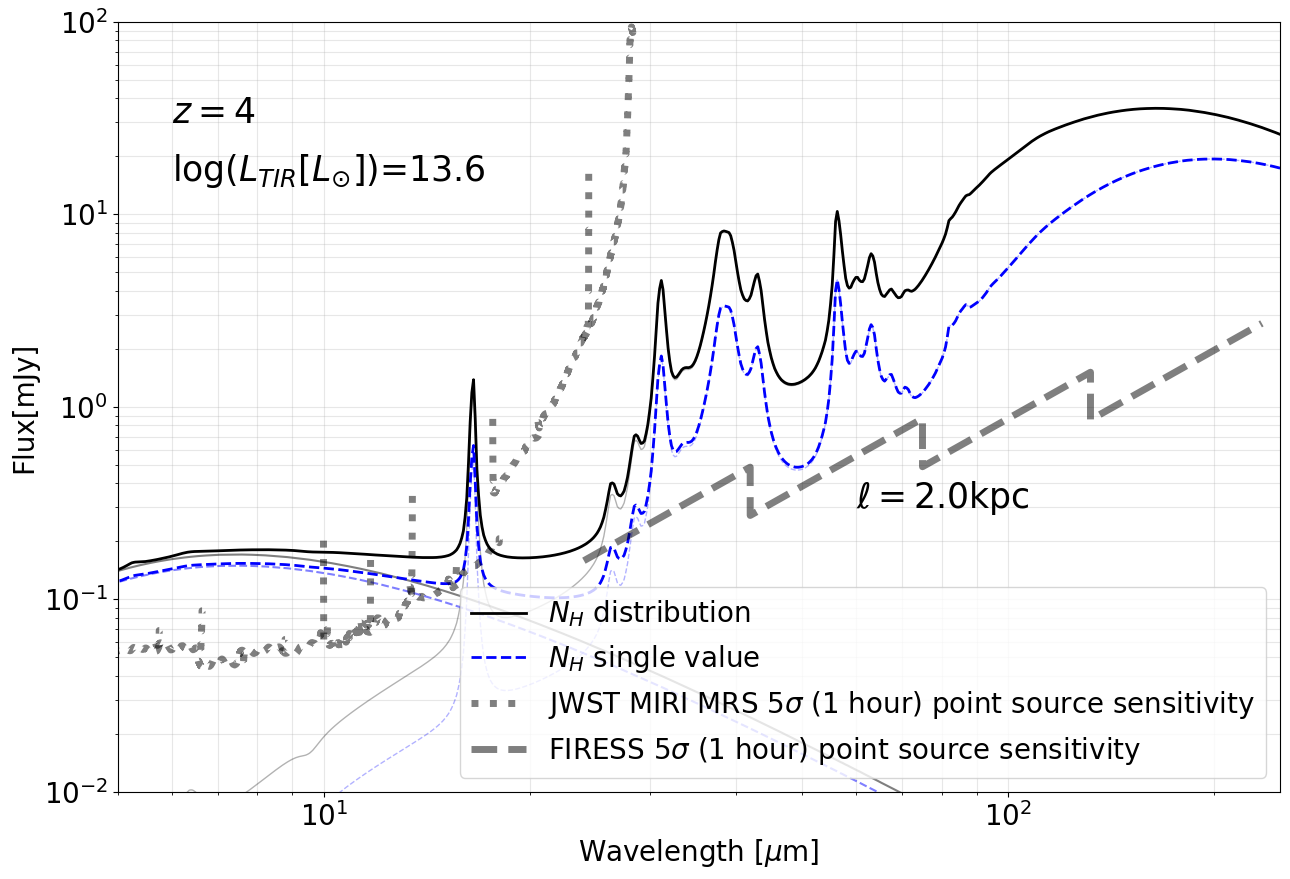

In [169]:
#creating figure 3b
files=['pahspec.out_mmpisrf_0.00_st_std',
       'pahspec.out_mmpisrf_0.50_st_std',
       'pahspec.out_mmpisrf_1.00_st_std',
       'pahspec.out_mmpisrf_1.50_st_std',
       'pahspec.out_mmpisrf_2.00_st_std',
       'pahspec.out_mmpisrf_2.50_st_std',
       'pahspec.out_mmpisrf_3.00_st_std',
       'pahspec.out_mmpisrf_3.50_st_std',
       'pahspec.out_mmpisrf_4.00_st_std',
       'pahspec.out_mmpisrf_4.50_st_std',
       'pahspec.out_mmpisrf_5.00_st_std',
       'pahspec.out_mmpisrf_5.50_st_std',
       'pahspec.out_mmpisrf_6.00_st_std',
       'pahspec.out_mmpisrf_6.50_st_std',
       'pahspec.out_mmpisrf_7.00_st_std']
uval=[]
for i in range(len(files)):
    uval.append(float(files[i].split('_')[2]))
#
filename='isrf_mmpisrf_0.00'
swave,sflux0=np.loadtxt(filename, unpack=True, usecols=(0,1),skiprows=7)

fig,ax=plt.subplots(figsize=(15,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,250)
plt.ylim(1e-2,1e2)
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'Flux'+'[mJy]',fontsize=20)
plt.grid(which='both',alpha=0.3)

#interpolate
wave_interp=np.logspace(0,2.47,num=1000)

myz=4.0
size=2.0
#size=0.02236
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(myz)

wave,jtot,jdust,jpahi,jpahn=np.loadtxt('../'+files[0], unpack=True, usecols=(0,1,2,3,4),skiprows=7)
nden=len(logU)

sed=np.zeros(len(wave_interp))
pahspec=np.zeros(len(wave_interp))
stellar=np.zeros(len(wave_interp))

#sed_avg=np.zeros(len(wave_interp))
#pahspec_avg=np.zeros(len(wave_interp))
#stellar_avg=np.zeros(len(wave_interp))

#representative spectrum
idx=np.where(uval-np.log10(Uavg2)<0.5)[0]
id1=idx[-1]
id0=idx[-2]
logU1=uval[idx[-1]]
logU0=uval[idx[-2]]
filename1='../'+files[id1]
filename0='../'+files[id0]
wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    
wave0=wave0*(1+myz)
wave1=wave1*(1+myz)

flux0=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol_avg*(jtot0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
flux1=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol_avg*(jtot1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
flux0intp=np.interp(wave_interp,wave0,flux0)
flux1intp=np.interp(wave_interp,wave1,flux1)
    
sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
sed0=flux0intp+sflux0intp
sed1=flux1intp+sflux1intp

#pahspec_avg=(flux0intp*(logU1-logUavg2)+flux1intp*(logUavg2-logU0))/(logU1-logU0)    
#stellar_avg=(sflux0intp*(logU1-logUavg2)+sflux1intp*(logUavg2-logU0))/(logU1-logU0)
#sed_avg=(sed0*(logU1-logUavg2)+sed1*(logUavg2-logU0))/(logU1-logU0)

pahspec_avg=(flux0intp*(10**logU1-10**logUavg2)+flux1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)    
stellar_avg=(sflux0intp*(10**logU1-10**logUavg2)+sflux1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)
sed_avg=(sed0*(10**logU1-10**logUavg2)+sed1*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)

Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
LTIR0=float(Lir_data0[0])
LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol_avg)/(3.8e33)
Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
LTIR1=float(Lir_data1[0])
LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol_avg)/(3.8e33)
#LTIR_avg=(LTIR0*(logU1-logUavg2)+LTIR1*(logUavg2-logU0))/(logU1-logU0)
LTIR_avg=(LTIR0*(10**logU1-10**logUavg2)+LTIR1*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)

print(np.log10(LTIR_avg))

LTIR=0.0

for i, myu in enumerate(logU):
    idx=np.where(uval-myu<0.5)[0]
    id1=idx[-1]
    id0=idx[-2]
    logU1=uval[idx[-1]]
    logU0=uval[idx[-2]]
    filename1='../'+files[id1]
    filename0='../'+files[id0]
    wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

    wave0=wave0*(1+myz)
    wave1=wave1*(1+myz)
    flux0=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jtot0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jtot1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

    sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
    sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
    flux0intp=np.interp(wave_interp,wave0,flux0)
    flux1intp=np.interp(wave_interp,wave1,flux1)
    
    sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
    sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
    sed0=flux0intp+sflux0intp
    sed1=flux1intp+sflux1intp

    #pahspec=pahspec+(flux0intp*(logU1-myu)+flux1intp*(myu-logU0))/(logU1-logU0)    
    #stellar=stellar+(sflux0intp*(logU1-myu)+sflux1intp*(myu-logU0))/(logU1-logU0)
    #sed=sed+(sed0*(logU1-myu)+sed1*(myu-logU0))/(logU1-logU0)

    pahspec=pahspec+(flux0intp*(10**logU1-10**myu)+flux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)    
    stellar=stellar+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed=sed+(sed0*(10**logU1-10**myu)+sed1*(10**myu-10**logU0))/(10**logU1-10**logU0)

    
    Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
    LTIR0=float(Lir_data0[0])
    LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol[i])/(3.8e33)
    Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
    LTIR1=float(Lir_data1[0])
    LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol[i])/(3.8e33)

    #LTIR=LTIR+((LTIR0*(logU1-myu)+LTIR1*(myu-logU0))/(logU1-logU0))
    LTIR=LTIR+((LTIR0*(10**logU1-10**myu)+LTIR1*(10**myu-10**logU0))/(10**logU1-10**logU0))
#
pahspec=pahspec/float(nden)
stellar=stellar/float(nden)
sed=sed/float(nden)
LTIR=LTIR/float(nden)

print(np.log10(LTIR))

plt.plot(wave_interp,pahspec*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed*1e3,linewidth=2,color='black',label=r'$N_H$ distribution')
#plt.plot(swave*(1+myz),sflux0*1e3,linewidth=2)

plt.plot(wave_interp,pahspec_avg*1e3,linewidth=1,alpha=0.3,color='blue',linestyle='--')
plt.plot(wave_interp,stellar_avg*1e3,color='blue',alpha=0.5,linestyle='--')
plt.plot(wave_interp,sed_avg*1e3,linewidth=2,color='blue',linestyle='--',label=r'$N_H$ single value')

plt.legend()

for i in range(len(wave_jwst)):
    mywave=wave_jwst[i]
    myflux=sensi_jwst[i]
    if i==0:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
    else:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,zorder=5)

plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
#for i in range(4):
#    plt.step(wave,sensi_prima,linewidth=3,linestyle='-',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')

plt.annotate(xy=(6,15),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(np.log10(LTIR),2)),fontsize=25)

#plt.annotate(xy=(60,0.15),text=r'$log(N_H [cm^{-2}])=$'+str(np.log10(Ncol)),fontsize=20)
plt.annotate(xy=(60,0.30),text=r'$\ell=$'+str(size)+'kpc',fontsize=25) 
#plt.annotate(xy=(60,0.15),text=r'$F_{\nu}=\frac{\pi}{4}\ell^2 N_H (\frac{4\pi j_{\nu}}{n_H})/4\pi D_L^2$ [Jy]',fontsize=20)

#plt.annotate(xy=(60,40),text=r'$z=2$',fontsize=15)
plt.annotate(xy=(6,30),text=r'$z=4$',fontsize=25)
#plt.annotate(xy=(150,8),text=r'$z=6$',fontsize=15)
#plt.annotate(xy=(200,6),text=r'$z=8$',fontsize=15)

plt.legend(loc=4,fontsize=20)
plt.savefig('flux_dist_single_lognorm_N23_v2.png',dpi=600)

['U1e3_1e3_MW3.1_00.txt', 'U1e3_1e3_MW3.1_10.txt', 'U1e3_1e3_MW3.1_20.txt', 'U1e3_1e3_MW3.1_30.txt', 'U1e3_1e3_MW3.1_40.txt', 'U1e3_1e3_MW3.1_50.txt', 'U1e3_1e3_MW3.1_60.txt']
['U1e4_1e4_MW3.1_00.txt', 'U1e4_1e4_MW3.1_10.txt', 'U1e4_1e4_MW3.1_20.txt', 'U1e4_1e4_MW3.1_30.txt', 'U1e4_1e4_MW3.1_40.txt', 'U1e4_1e4_MW3.1_50.txt', 'U1e4_1e4_MW3.1_60.txt']
4.0 3.0 3.7140427355794983
[1.00531601 1.00512528 1.00549451 ... 0.27236599 0.27248867 0.27245863]
[1.00478088 1.00538048 1.00518903 ... 0.2724359  0.27241583 0.27238151]
13.604586527922011


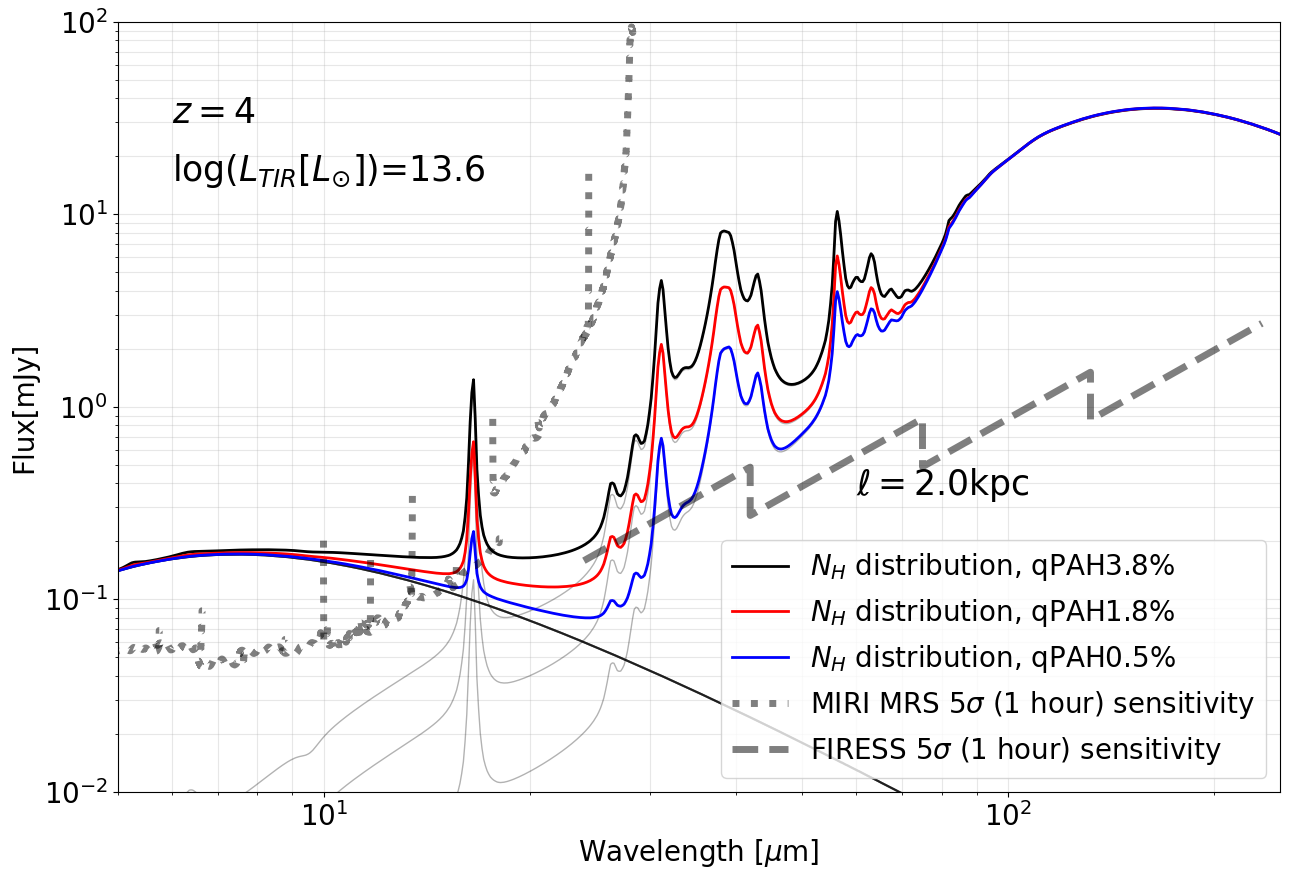

In [170]:
fig,ax=plt.subplots(figsize=(15,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,250)
plt.ylim(1e-2,1e2)
#plt.ylim(20,50)
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'Flux'+'[mJy]',fontsize=20)
plt.grid(which='both',alpha=0.3)

#interpolate
wave_interp=np.logspace(0,2.47,num=1000)

myz=4.0
size=2.0
#size=0.02236
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(myz)

wave,jtot,jdust,jpahi,jpahn=np.loadtxt('../'+files[0], unpack=True, usecols=(0,1,2,3,4),skiprows=7)
nden=len(logU)

sed=np.zeros(len(wave_interp))
pahspec=np.zeros(len(wave_interp))
stellar=np.zeros(len(wave_interp))

sed_lo=np.zeros(len(wave_interp))
pahspec_lo=np.zeros(len(wave_interp))
stellar_lo=np.zeros(len(wave_interp))

sed_med=np.zeros(len(wave_interp))
pahspec_med=np.zeros(len(wave_interp))
stellar_med=np.zeros(len(wave_interp))


#sed_avg=np.zeros(len(wave_interp))
#pahspec_avg=np.zeros(len(wave_interp))
#stellar_avg=np.zeros(len(wave_interp))

#representative spectrum
log_uval_qpah=np.log10(uval_qpah)
idx=np.where(log_uval_qpah-np.log10(Uavg2)<1.0)[0]
id1=idx[-1]
id0=idx[-2]
logU1=log_uval_qpah[idx[-1]]
logU0=log_uval_qpah[idx[-2]]
filename1=filelist[id1]
filename0=filelist[id0]

print(filename0)
print(filename1)

wave,emiss_norm=np.loadtxt(filename0[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio0=[]
for i, file in enumerate(filename0):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio0.append(emiss/emiss_norm)
#plt.plot(wave*(1+myz),ratio0[0])

wave,emiss_norm=np.loadtxt(filename1[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio1=[]
for i, file in enumerate(filename1):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio1.append(emiss/emiss_norm)

#Draine and Li model has reverse order spectrum: nm is decreasing, so it needs to be flip.

print(logU1,logU0,logUavg2)
print(ratio0[1])
print(ratio1[1])

#qPAH try: 0.5%: ratio[0]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[0]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[0]))
qPAH_low=(ratio0intp*(10**logU1-10**logUavg2)+ratio1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)

#qPAH try: 1.8%: ratio[2]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[2]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[2]))
qPAH_med=(ratio0intp*(10**logU1-10**logUavg2)+ratio1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)
#plt.plot(wave*(1+myz),ratio0[0])
#plt.plot(wave*(1+myz),ratio1[0])
#plt.plot(wave_interp,qPAH_low)
#plt.plot(wave_interp,qPAH_med)


LTIR=0.0

for i, myu in enumerate(logU):
    idx=np.where(uval-myu<0.5)[0]
    id1=idx[-1]
    id0=idx[-2]
    logU1=uval[idx[-1]]
    logU0=uval[idx[-2]]
    filename1='../'+files[id1]
    filename0='../'+files[id0]
    wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

    wave0=wave0*(1+myz)
    wave1=wave1*(1+myz)
    flux0_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jdust0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jdust1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

    flux0_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jpahi0+jpahn0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jpahi1+jpahn1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2
        
    sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
    sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
    flux0intp_st=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)
    flux1intp_st=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)
    flux0intp_lo=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_low
    flux1intp_lo=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_low
    flux0intp_med=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_med
    flux1intp_med=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_med
    
    
    sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
    sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
    sed0=flux0intp_st+sflux0intp
    sed1=flux1intp_st+sflux1intp

    sed0_lo=flux0intp_lo+sflux0intp
    sed1_lo=flux1intp_lo+sflux1intp
    
    sed0_med=flux0intp_med+sflux0intp
    sed1_med=flux1intp_med+sflux1intp

    pahspec=pahspec+(flux0intp_st*(10**logU1-10**myu)+flux1intp_st*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_lo=pahspec_lo+(flux0intp_lo*(10**logU1-10**myu)+flux1intp_lo*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_med=pahspec_med+(flux0intp_med*(10**logU1-10**myu)+flux1intp_med*(10**myu-10**logU0))/(10**logU1-10**logU0)
    
    stellar=stellar+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed=sed+(sed0*(10**logU1-10**myu)+sed1*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_lo=sed_lo+(sed0_lo*(10**logU1-10**myu)+sed1_lo*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_med=sed_med+(sed0_med*(10**logU1-10**myu)+sed1_med*(10**myu-10**logU0))/(10**logU1-10**logU0)

    
    Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
    LTIR0=float(Lir_data0[0])
    LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol[i])/(3.8e33)
    Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
    LTIR1=float(Lir_data1[0])
    LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol[i])/(3.8e33)

    LTIR=LTIR+((LTIR0*(10**logU1-10**myu)+LTIR1*(10**myu-10**logU0))/(10**logU1-10**logU0))

#
pahspec=pahspec/float(nden)
stellar=stellar/float(nden)
sed=sed/float(nden)
pahspec_lo=pahspec_lo/float(nden)
sed_lo=sed_lo/float(nden)
pahspec_med=pahspec_med/float(nden)
sed_med=sed_med/float(nden)



LTIR=LTIR/float(nden)

print(np.log10(LTIR))

plt.plot(wave_interp,pahspec*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed*1e3,linewidth=2,color='black',label=r'$N_H$ distribution, qPAH3.8%')

plt.plot(wave_interp,pahspec_med*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed_med*1e3,linewidth=2,color='red',label=r'$N_H$ distribution, qPAH1.8%')

plt.plot(wave_interp,pahspec_lo*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed_lo*1e3,linewidth=2,color='blue',label=r'$N_H$ distribution, qPAH0.5%')


#plt.plot(swave*(1+myz),sflux0*1e3,linewidth=2)

plt.legend()

for i in range(len(wave_jwst)):
    mywave=wave_jwst[i]
    myflux=sensi_jwst[i]
    if i==0:
        #plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'MIRI MRS 5$\sigma$ (1 hour) sensitivity',zorder=5)
    else:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,zorder=5)

#plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) sensitivity',zorder=5)
#for i in range(4):
#    plt.step(wave,sensi_prima,linewidth=3,linestyle='-',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')

plt.annotate(xy=(6,15),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(np.log10(LTIR),2)),fontsize=25)

#plt.annotate(xy=(60,0.15),text=r'$log(N_H [cm^{-2}])=$'+str(np.log10(Ncol)),fontsize=20)
plt.annotate(xy=(60,0.35),text=r'$\ell=$'+str(size)+'kpc',fontsize=25) 
#plt.annotate(xy=(60,0.15),text=r'$F_{\nu}=\frac{\pi}{4}\ell^2 N_H (\frac{4\pi j_{\nu}}{n_H})/4\pi D_L^2$ [Jy]',fontsize=20)

#plt.annotate(xy=(60,40),text=r'$z=2$',fontsize=15)
plt.annotate(xy=(6,30),text=r'$z=4$',fontsize=25)
#plt.annotate(xy=(150,8),text=r'$z=6$',fontsize=15)
#plt.annotate(xy=(200,6),text=r'$z=8$',fontsize=15)

plt.legend(loc=4,fontsize=20)
#plt.savefig('spec_qPAH_z4_composite_N23.png',dpi=600)
plt.savefig('spec_qPAH_z4_lognorm_N23_v2.png',dpi=600)


2.144435735375558 6.386896282205169
3.6096164693828143


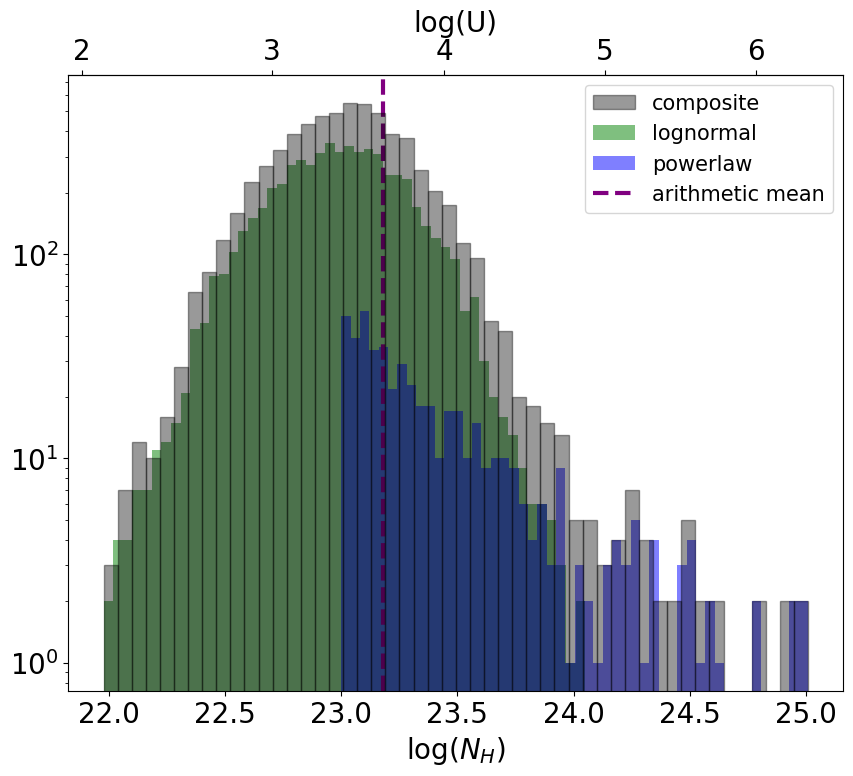

In [64]:
#creating density distribution
Z = expon(loc=0.0,scale=0.4*np.log(10.0))
z = Z.rvs(size=500)

X = norm(loc=0.0, scale=0.3*np.log(10.0))
x = X.rvs(size=6000)

#compute column density distribution
logNcol=23.0
lnNcol=(np.array(list(x)+list(z)))
lnNcol_avg=np.mean(np.array(list(x)+list(z)))
lnN0=logNcol*np.log(10.0)
Ncol=np.exp(lnNcol+lnN0)
Ncol_avg=np.mean(Ncol)
lnNcol_avg=np.mean(lnNcol+lnN0)
#compute U distribution
sigGas=(Ncol/1e20)
sigSFR=2.5e-4*(sigGas)**1.4
U=sigSFR/(10**(-2.5))*3.0
logU=np.log10(U)
print(np.log10(min(U)),np.log10(max(U)))
Uavg=np.mean(U)
logUavg=np.mean(logU)
print(logUavg)

sigGas2=(Ncol_avg/1e20)
sigSFR2=2.5e-4*(sigGas2)**1.4
Uavg2=sigSFR2/(10**(-2.5))*3.0
logUavg2=np.log10(Uavg2)

#
def Ncol2logU(x):
    #U=(2.5e-4*(np.exp(x)/1e20)**1.4)/(10**(-2.5))*3.0
    U=(2.5e-4*(10**(x)/1e20)**1.4)/(10**(-2.5))*3.0
    return np.log10(U)

def logU2Ncol(x):
    Ncol=np.power((x/3.0)*(10**(-2.5))/2.5e-4,1.0/1.4)*1e20
    return Ncol 

#plotting
ncoldist=lnNcol+lnN0
ncoldist2=ncoldist/np.log(10.0)
fig, ax = plt.subplots(figsize=(10,8))
#ax.hist(x+lnN0, density=False, bins=50, label='lognormal',color='green',alpha=0.5,edgecolor='black')
ax.hist(ncoldist2, density=False, bins=50, label='composite',color='black',alpha=0.4,edgecolor='black',zorder=4)
ax.hist((x+lnN0)/np.log(10.0), density=False, bins=50, label='lognormal',color='green',alpha=0.5)
ax.hist((z+lnN0)/np.log(10.0), density=False, bins=50, label='powerlaw',color='blue',alpha=0.5)

ax.axvline(np.log10(Ncol_avg),color='purple',label='arithmetic mean',linewidth=3,linestyle='--')

left=(np.nanmax(Ncol2logU(ncoldist2)))
right=(np.nanmin(Ncol2logU(ncoldist2)))
secax = ax.secondary_xaxis('top', functions=(Ncol2logU, logU2Ncol))
secax.set_xlim(right,left)
secax.xaxis_inverted()
secax.set_xlabel(r'log(U)',fontsize=20)

#ax.hist(z, density=False, bins=50, label='powerlaw',color='blue',alpha=0.5)
#ax.hist(np.array(list(x)+list(z)),density=False,bins=50, label='composite',color='black',edgecolor='black',alpha=0.4)
#ax.axvline(logNcol_avg-logN0,color='cyan',label='geometric mean')
#ax.axvline(np.log10(Ncol_avg)-logN0,color='purple',label='arithmetic mean')
ax.legend(loc=0,fontsize=15)
ax.set_yscale('log')
plt.xlabel(r'log($N_H$)',fontsize=20)
#plt.annotate(xy=(0.5,140),text=r'$N_0=10^{23}$cm$^{-2}$',fontsize=20)
plt.savefig('Ncol_dist_composite_N23.png',dpi=600)

goodid=np.where((logU>=0.0) & (logU<=7.0))[0]
Ncol=Ncol[goodid]
U=U[goodid]
logU=logU[goodid]

13.45283745094341
14.75764116526101


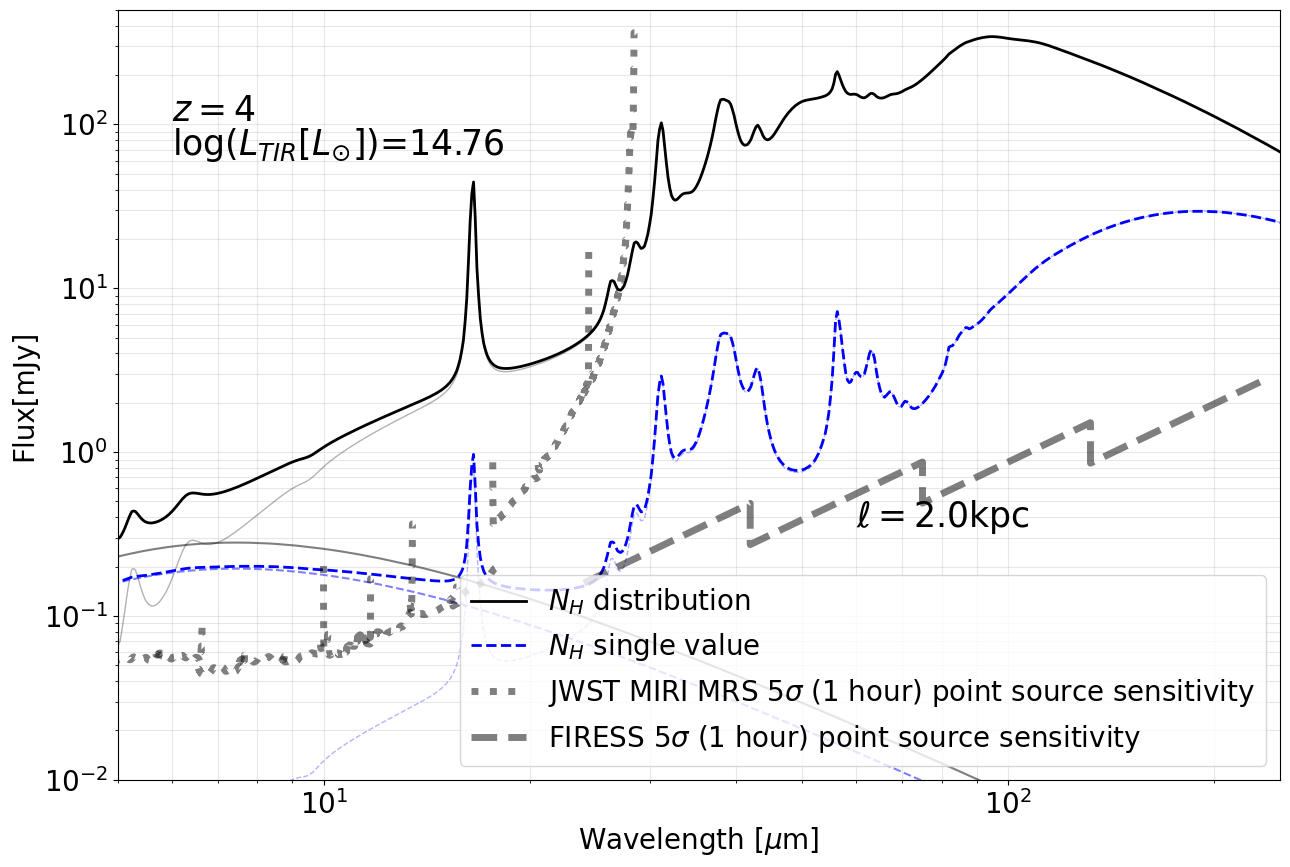

In [67]:
fig,ax=plt.subplots(figsize=(15,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,250)
plt.ylim(1e-2,5e2)
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'Flux'+'[mJy]',fontsize=20)
plt.grid(which='both',alpha=0.3)

#interpolate
wave_interp=np.logspace(0,2.47,num=1000)

myz=4.0
size=2.0
#size=0.02236
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(myz)

wave,jtot,jdust,jpahi,jpahn=np.loadtxt('../'+files[0], unpack=True, usecols=(0,1,2,3,4),skiprows=7)
nden=len(logU)

sed=np.zeros(len(wave_interp))
pahspec=np.zeros(len(wave_interp))
stellar=np.zeros(len(wave_interp))

#sed_avg=np.zeros(len(wave_interp))
#pahspec_avg=np.zeros(len(wave_interp))
#stellar_avg=np.zeros(len(wave_interp))

#representative spectrum
idx=np.where(uval-np.log10(Uavg2)<0.5)[0]
id1=idx[-1]
id0=idx[-2]
logU1=uval[idx[-1]]
logU0=uval[idx[-2]]
filename1=files[id1]
filename0=files[id0]
wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    
wave0=wave0*(1+myz)
wave1=wave1*(1+myz)

flux0=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol_avg*(jtot0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
flux1=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol_avg*(jtot1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
flux0intp=np.interp(wave_interp,wave0,flux0)
flux1intp=np.interp(wave_interp,wave1,flux1)
    
sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
sed0=flux0intp+sflux0intp
sed1=flux1intp+sflux1intp

#pahspec_avg=(flux0intp*(logU1-logUavg2)+flux1intp*(logUavg2-logU0))/(logU1-logU0)    
#stellar_avg=(sflux0intp*(logU1-logUavg2)+sflux1intp*(logUavg2-logU0))/(logU1-logU0)
#sed_avg=(sed0*(logU1-logUavg2)+sed1*(logUavg2-logU0))/(logU1-logU0)

pahspec_avg=(flux0intp*(10**logU1-10**logUavg2)+flux1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)    
stellar_avg=(sflux0intp*(10**logU1-10**logUavg2)+sflux1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)
sed_avg=(sed0*(10**logU1-10**logUavg2)+sed1*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)

Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
LTIR0=float(Lir_data0[0])
LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol_avg)/(3.8e33)
Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
LTIR1=float(Lir_data1[0])
LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol_avg)/(3.8e33)
#LTIR_avg=(LTIR0*(logU1-logUavg2)+LTIR1*(logUavg2-logU0))/(logU1-logU0)
LTIR_avg=(LTIR0*(10**logU1-10**logUavg2)+LTIR1*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)
print(np.log10(LTIR_avg))

LTIR=0.0

for i, myu in enumerate(logU):
    idx=np.where(uval-myu<0.5)[0]
    id1=idx[-1]
    id0=idx[-2]
    logU1=uval[idx[-1]]
    logU0=uval[idx[-2]]
    filename1='../'+files[id1]
    filename0='../'+files[id0]
    wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

    wave0=wave0*(1+myz)
    wave1=wave1*(1+myz)
    flux0=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jtot0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jtot1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

    sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
    sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
    flux0intp=np.interp(wave_interp,wave0,flux0)
    flux1intp=np.interp(wave_interp,wave1,flux1)
    
    sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
    sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
    sed0=flux0intp+sflux0intp
    sed1=flux1intp+sflux1intp

    #pahspec=pahspec+(flux0intp*(logU1-myu)+flux1intp*(myu-logU0))/(logU1-logU0)    
    #stellar=stellar+(sflux0intp*(logU1-myu)+sflux1intp*(myu-logU0))/(logU1-logU0)
    #sed=sed+(sed0*(logU1-myu)+sed1*(myu-logU0))/(logU1-logU0)

    pahspec=pahspec+(flux0intp*(10**logU1-10**myu)+flux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)    
    stellar=stellar+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed=sed+(sed0*(10**logU1-10**myu)+sed1*(10**myu-10**logU0))/(10**logU1-10**logU0)
    
    Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
    LTIR0=float(Lir_data0[0])
    LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol[i])/(3.8e33)
    Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
    LTIR1=float(Lir_data1[0])
    LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol[i])/(3.8e33)

    #LTIR=LTIR+((LTIR0*(logU1-myu)+LTIR1*(myu-logU0))/(logU1-logU0))
    LTIR=LTIR+((LTIR0*(10**logU1-10**myu)+LTIR1*(10**myu-10**logU0))/(10**logU1-10**logU0))

#
pahspec=pahspec/float(nden)
stellar=stellar/float(nden)
sed=sed/float(nden)
LTIR=LTIR/float(nden)

print(np.log10(LTIR))

plt.plot(wave_interp,pahspec*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed*1e3,linewidth=2,color='black',label=r'$N_H$ distribution')
#plt.plot(swave*(1+myz),sflux0*1e3,linewidth=2)

plt.plot(wave_interp,pahspec_avg*1e3,linewidth=1,alpha=0.3,color='blue',linestyle='--')
plt.plot(wave_interp,stellar_avg*1e3,color='blue',alpha=0.5,linestyle='--')
plt.plot(wave_interp,sed_avg*1e3,linewidth=2,color='blue',linestyle='--',label=r'$N_H$ single value')

plt.legend()

for i in range(len(wave_jwst)):
    mywave=wave_jwst[i]
    myflux=sensi_jwst[i]
    if i==0:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
    else:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,zorder=5)

plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
#for i in range(4):
#    plt.step(wave,sensi_prima,linewidth=3,linestyle='-',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')

plt.annotate(xy=(6,65),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(np.log10(LTIR),2)),fontsize=25)

#plt.annotate(xy=(60,0.15),text=r'$log(N_H [cm^{-2}])=$'+str(np.log10(Ncol)),fontsize=20)
plt.annotate(xy=(60,0.35),text=r'$\ell=$'+str(size)+'kpc',fontsize=25) 
#plt.annotate(xy=(60,0.15),text=r'$F_{\nu}=\frac{\pi}{4}\ell^2 N_H (\frac{4\pi j_{\nu}}{n_H})/4\pi D_L^2$ [Jy]',fontsize=20)

#plt.annotate(xy=(60,40),text=r'$z=2$',fontsize=15)
plt.annotate(xy=(6,105),text=r'$z=4$',fontsize=25)
#plt.annotate(xy=(150,8),text=r'$z=6$',fontsize=15)
#plt.annotate(xy=(200,6),text=r'$z=8$',fontsize=15)

plt.legend(loc=4,fontsize=20)
plt.savefig('flux_dist_single_composite_N23.png',dpi=600)

['U1e3_1e3_MW3.1_00.txt', 'U1e3_1e3_MW3.1_10.txt', 'U1e3_1e3_MW3.1_20.txt', 'U1e3_1e3_MW3.1_30.txt', 'U1e3_1e3_MW3.1_40.txt', 'U1e3_1e3_MW3.1_50.txt', 'U1e3_1e3_MW3.1_60.txt']
['U1e4_1e4_MW3.1_00.txt', 'U1e4_1e4_MW3.1_10.txt', 'U1e4_1e4_MW3.1_20.txt', 'U1e4_1e4_MW3.1_30.txt', 'U1e4_1e4_MW3.1_40.txt', 'U1e4_1e4_MW3.1_50.txt', 'U1e4_1e4_MW3.1_60.txt']
4.0 3.0 3.827935317193603
[1.00531601 1.00512528 1.00549451 ... 0.27236599 0.27248867 0.27245863]
[1.00478088 1.00538048 1.00518903 ... 0.2724359  0.27241583 0.27238151]
14.75764116526101


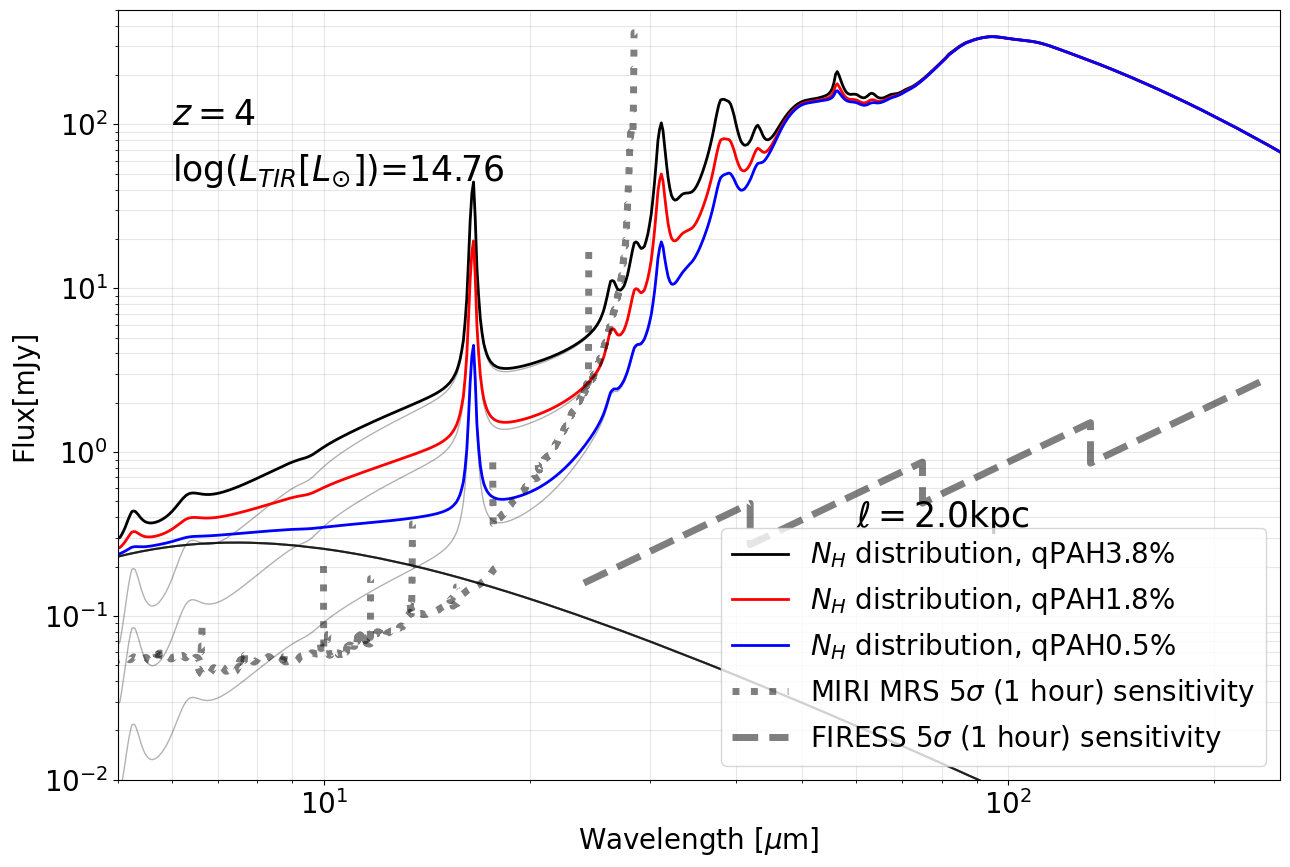

In [72]:
fig,ax=plt.subplots(figsize=(15,10))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(5,250)
plt.ylim(1e-2,5e2)
#plt.ylim(20,50)
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'Flux'+'[mJy]',fontsize=20)
plt.grid(which='both',alpha=0.3)

#interpolate
wave_interp=np.logspace(0,2.47,num=1000)

myz=4.0
size=2.0
#size=0.02236
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(myz)

wave,jtot,jdust,jpahi,jpahn=np.loadtxt('../'+files[0], unpack=True, usecols=(0,1,2,3,4),skiprows=7)
nden=len(logU)

sed=np.zeros(len(wave_interp))
pahspec=np.zeros(len(wave_interp))
stellar=np.zeros(len(wave_interp))

sed_lo=np.zeros(len(wave_interp))
pahspec_lo=np.zeros(len(wave_interp))
stellar_lo=np.zeros(len(wave_interp))

sed_med=np.zeros(len(wave_interp))
pahspec_med=np.zeros(len(wave_interp))
stellar_med=np.zeros(len(wave_interp))


#sed_avg=np.zeros(len(wave_interp))
#pahspec_avg=np.zeros(len(wave_interp))
#stellar_avg=np.zeros(len(wave_interp))

#representative spectrum
log_uval_qpah=np.log10(uval_qpah)
idx=np.where(log_uval_qpah-np.log10(Uavg2)<1.0)[0]
id1=idx[-1]
id0=idx[-2]
logU1=log_uval_qpah[idx[-1]]
logU0=log_uval_qpah[idx[-2]]
filename1=filelist[id1]
filename0=filelist[id0]

print(filename0)
print(filename1)

wave,emiss_norm=np.loadtxt(filename0[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio0=[]
for i, file in enumerate(filename0):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio0.append(emiss/emiss_norm)
#plt.plot(wave*(1+myz),ratio0[0])

wave,emiss_norm=np.loadtxt(filename1[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio1=[]
for i, file in enumerate(filename1):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio1.append(emiss/emiss_norm)

#Draine and Li model has reverse order spectrum: nm is decreasing, so it needs to be flip.

print(logU1,logU0,logUavg2)
print(ratio0[1])
print(ratio1[1])

#qPAH try: 0.5%: ratio[0]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[0]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[0]))
qPAH_low=(ratio0intp*(10**logU1-10**logUavg2)+ratio1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)

#qPAH try: 1.8%: ratio[2]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[2]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[2]))
qPAH_med=(ratio0intp*(10**logU1-10**logUavg2)+ratio1intp*(10**logUavg2-10**logU0))/(10**logU1-10**logU0)
#plt.plot(wave*(1+myz),ratio0[0])
#plt.plot(wave*(1+myz),ratio1[0])
#plt.plot(wave_interp,qPAH_low)
#plt.plot(wave_interp,qPAH_med)


LTIR=0.0

for i, myu in enumerate(logU):
    idx=np.where(uval-myu<0.5)[0]
    id1=idx[-1]
    id0=idx[-2]
    logU1=uval[idx[-1]]
    logU0=uval[idx[-2]]
    filename1=files[id1]
    filename0=files[id0]
    wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

    wave0=wave0*(1+myz)
    wave1=wave1*(1+myz)
    flux0_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jdust0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jdust1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

    flux0_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jpahi0+jpahn0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[i]*(jpahi1+jpahn1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2
        
    sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
    sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
    flux0intp_st=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)
    flux1intp_st=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)
    flux0intp_lo=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_low
    flux1intp_lo=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_low
    flux0intp_med=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_med
    flux1intp_med=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_med
    
    
    sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
    sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
    sed0=flux0intp_st+sflux0intp
    sed1=flux1intp_st+sflux1intp

    sed0_lo=flux0intp_lo+sflux0intp
    sed1_lo=flux1intp_lo+sflux1intp
    
    sed0_med=flux0intp_med+sflux0intp
    sed1_med=flux1intp_med+sflux1intp

    pahspec=pahspec+(flux0intp_st*(10**logU1-10**myu)+flux1intp_st*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_lo=pahspec_lo+(flux0intp_lo*(10**logU1-10**myu)+flux1intp_lo*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_med=pahspec_med+(flux0intp_med*(10**logU1-10**myu)+flux1intp_med*(10**myu-10**logU0))/(10**logU1-10**logU0)
    
    stellar=stellar+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed=sed+(sed0*(10**logU1-10**myu)+sed1*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_lo=sed_lo+(sed0_lo*(10**logU1-10**myu)+sed1_lo*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_med=sed_med+(sed0_med*(10**logU1-10**myu)+sed1_med*(10**myu-10**logU0))/(10**logU1-10**logU0)

    
    Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
    LTIR0=float(Lir_data0[0])
    LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol[i])/(3.8e33)
    Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
    LTIR1=float(Lir_data1[0])
    LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol[i])/(3.8e33)

    LTIR=LTIR+((LTIR0*(10**logU1-10**myu)+LTIR1*(10**myu-10**logU0))/(10**logU1-10**logU0))

#
pahspec=pahspec/float(nden)
stellar=stellar/float(nden)
sed=sed/float(nden)
pahspec_lo=pahspec_lo/float(nden)
sed_lo=sed_lo/float(nden)
pahspec_med=pahspec_med/float(nden)
sed_med=sed_med/float(nden)



LTIR=LTIR/float(nden)

print(np.log10(LTIR))

plt.plot(wave_interp,pahspec*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed*1e3,linewidth=2,color='black',label=r'$N_H$ distribution, qPAH3.8%')

plt.plot(wave_interp,pahspec_med*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed_med*1e3,linewidth=2,color='red',label=r'$N_H$ distribution, qPAH1.8%')

plt.plot(wave_interp,pahspec_lo*1e3,linewidth=1,alpha=0.3,color='black')
plt.plot(wave_interp,stellar*1e3,color='black',alpha=0.5)
plt.plot(wave_interp,sed_lo*1e3,linewidth=2,color='blue',label=r'$N_H$ distribution, qPAH0.5%')


#plt.plot(swave*(1+myz),sflux0*1e3,linewidth=2)

plt.legend()

for i in range(len(wave_jwst)):
    mywave=wave_jwst[i]
    myflux=sensi_jwst[i]
    if i==0:
        #plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'JWST MIRI MRS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,label=r'MIRI MRS 5$\sigma$ (1 hour) sensitivity',zorder=5)
    else:
        plt.step(mywave,myflux,linewidth=5,linestyle='dotted',color='black',alpha=0.5,zorder=5)

#plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity',zorder=5)
plt.plot(wave_prima,sensi_prima,linewidth=5,linestyle='--',color='black',alpha=0.5,label=r'FIRESS 5$\sigma$ (1 hour) sensitivity',zorder=5)
#for i in range(4):
#    plt.step(wave,sensi_prima,linewidth=3,linestyle='-',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')

plt.annotate(xy=(6,45),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(np.log10(LTIR),2)),fontsize=25)

#plt.annotate(xy=(60,0.15),text=r'$log(N_H [cm^{-2}])=$'+str(np.log10(Ncol)),fontsize=20)
plt.annotate(xy=(60,0.35),text=r'$\ell=$'+str(size)+'kpc',fontsize=25) 
#plt.annotate(xy=(60,0.15),text=r'$F_{\nu}=\frac{\pi}{4}\ell^2 N_H (\frac{4\pi j_{\nu}}{n_H})/4\pi D_L^2$ [Jy]',fontsize=20)

#plt.annotate(xy=(60,40),text=r'$z=2$',fontsize=15)
plt.annotate(xy=(6,100),text=r'$z=4$',fontsize=25)
#plt.annotate(xy=(150,8),text=r'$z=6$',fontsize=15)
#plt.annotate(xy=(200,6),text=r'$z=8$',fontsize=15)

plt.legend(loc=4,fontsize=20)
#plt.savefig('spec_qPAH_z4_composite_N23.png',dpi=600)
plt.savefig('spec_qPAH_z4_composite_N23.png',dpi=600)


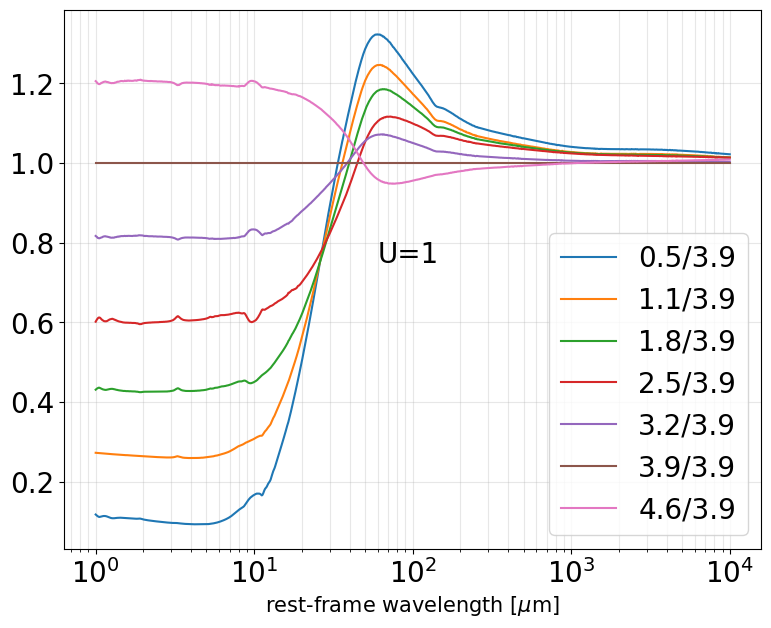

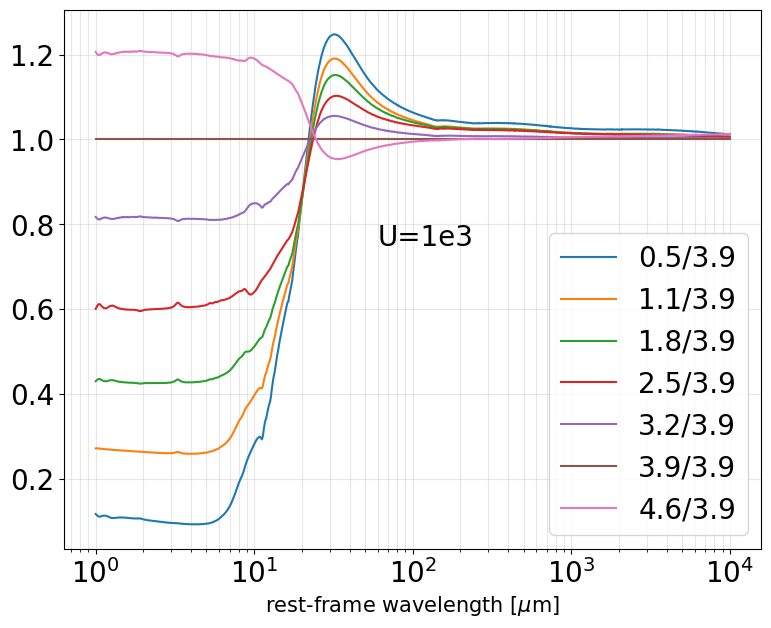

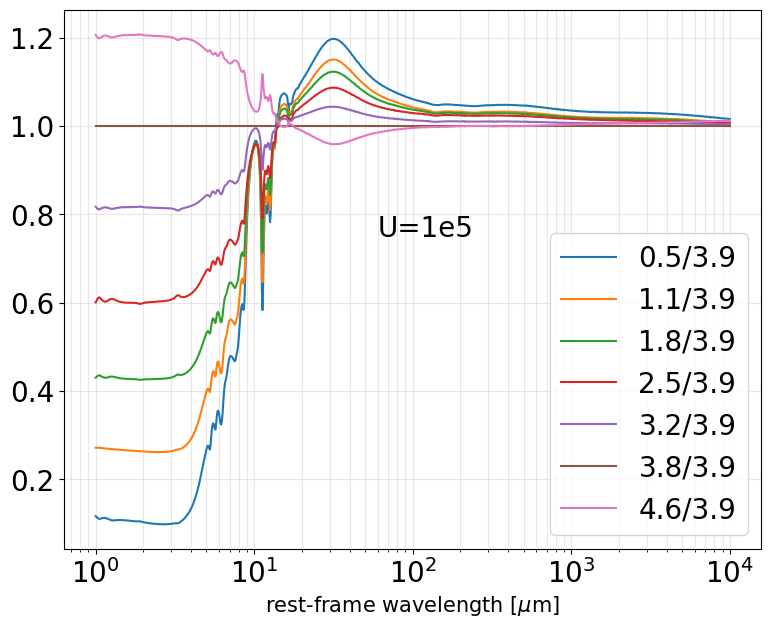

In [74]:
fig,ax=plt.subplots(figsize=(9,7))
wave,emiss1_norm,emiss2_norm=np.loadtxt(filesU0[5], unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
ratio=[]
for i,file in enumerate(filesU0):
    wave,emiss1,emiss2=np.loadtxt(file, unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
    ratio.append(emiss1/emiss1_norm)
plt.plot(wave,ratio[0],label='0.5/3.9')
plt.plot(wave,ratio[1],label='1.1/3.9')
plt.plot(wave,ratio[2],label='1.8/3.9')
plt.plot(wave,ratio[3],label='2.5/3.9')
plt.plot(wave,ratio[4],label='3.2/3.9')
plt.plot(wave,ratio[5],label='3.9/3.9')
plt.plot(wave,ratio[6],label='4.6/3.9')
plt.legend(fontsize=20)
plt.annotate(xy=(60,0.75),text=r'U=1',fontsize=20)
plt.xlabel(r'rest-frame wavelength [$\mu$m]',fontsize=15)
#plt.ylabel(r'qPAH$_f$/qPAH$_{3.9}$',fontsize=15)
plt.grid(which='both',alpha=0.3)
plt.xscale('log')
plt.savefig('qpah_ratio_U1.png',dpi=600)
plt.show()
########
fig,ax=plt.subplots(figsize=(9,7))
wave,emiss1_norm,emiss2_norm=np.loadtxt(filesU3[5], unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
ratio=[]
for i,file in enumerate(filesU3):
    wave,emiss1,emiss2=np.loadtxt(file, unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
    ratio.append(emiss1/emiss1_norm)
plt.plot(wave,ratio[0],label='0.5/3.9')
plt.plot(wave,ratio[1],label='1.1/3.9')
plt.plot(wave,ratio[2],label='1.8/3.9')
plt.plot(wave,ratio[3],label='2.5/3.9')
plt.plot(wave,ratio[4],label='3.2/3.9')
plt.plot(wave,ratio[5],label='3.9/3.9')
plt.plot(wave,ratio[6],label='4.6/3.9')
plt.legend(fontsize=20)
plt.xlabel(r'rest-frame wavelength [$\mu$m]',fontsize=15)
#plt.ylabel(r'qPAH$_f$/qPAH$_{3.9}$',fontsize=15)
plt.annotate(xy=(60,0.75),text=r'U=1e3',fontsize=20)
plt.grid(which='both',alpha=0.3)
plt.xscale('log')
#plt.yscale('log')
plt.savefig('qpah_ratio_U1e3.png',dpi=600)
plt.show()
###########
fig,ax=plt.subplots(figsize=(9,7))
wave,emiss1_norm,emiss2_norm=np.loadtxt(filesU5[5], unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
ratio=[]
for i,file in enumerate(filesU5):
    wave,emiss1,emiss2=np.loadtxt(file, unpack=True, usecols=(0,1,2),skiprows=61) #jpah [erg/s per H]
    ratio.append(emiss1/emiss1_norm)
plt.plot(wave,ratio[0],label='0.5/3.9')
plt.plot(wave,ratio[1],label='1.1/3.9')
plt.plot(wave,ratio[2],label='1.8/3.9')
plt.plot(wave,ratio[3],label='2.5/3.9')
plt.plot(wave,ratio[4],label='3.2/3.9')
plt.plot(wave,ratio[5],label='3.8/3.9')
plt.plot(wave,ratio[6],label='4.6/3.9')
plt.legend(fontsize=20)
plt.xlabel(r'rest-frame wavelength [$\mu$m]',fontsize=15)
#plt.ylabel(r'qPAH$_f$/qPAH$_{3.9}$',fontsize=15)
plt.annotate(xy=(60,0.75),text=r'U=1e5',fontsize=20)
plt.grid(which='both',alpha=0.3)
plt.xscale('log')
plt.savefig('qpah_ratio_U1e5.png',dpi=600)
plt.show()

In [173]:
redshift=np.array([2.0,3.0,5.0,7.0,10.0])
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=cosmo.luminosity_distance(redshift)

In [158]:
cspeed=2.99792458e10
wave1=np.linspace(24,42,100)
delnu1=cspeed/(wave1/1e4)/(wave1/1e4)*(0.23/1e4)
wave2=np.linspace(42,75,100)
delnu2=cspeed/(wave2/1e4)/(wave2/1e4)*(0.41/1e4)
wave3=np.linspace(75,132,100)
delnu3=cspeed/(wave3/1e4)/(wave3/1e4)*(0.73/1e4)
wave4=np.linspace(132,235,100)
delnu4=cspeed/(wave4/1e4)/(wave4/1e4)*(1.29/1e4)
sensi1=1.9e-19/delnu1/(1e-26) #Jy
sensi2=1.9e-19/delnu2/(1e-26) #Jy
sensi3=1.9e-19/delnu3/(1e-26) #Jy
sensi4=1.9e-19/delnu4/(1e-26) #Jy
sensi_wave=list(wave1)+list(wave2)+list(wave3)+list(wave4)
sensi_flux=list(sensi1)+list(sensi2)+list(sensi3)+list(sensi4)

#interpolate
wave_interp=np.logspace(0,2.47,num=1000)

In [183]:
#creating density distribution
Z = expon(loc=0.0,scale=0.4)
z = Z.rvs(size=0)

X = norm(loc=0.0, scale=0.3*np.log(10.0))
x = X.rvs(size=6000)

#compute column density distribution
size=2.0
#logNcol=22.0
#logNcol=22.40
logNcol=23.0
#logNcol=23.30
lnNcol=(np.array(list(x)+list(z)))
lnNcol_avg=np.mean(np.array(list(x)+list(z)))
lnN0=logNcol*np.log(10.0)
Ncol=np.exp(lnNcol+lnN0)
Ncol_avg=np.mean(Ncol)
lnNcol_avg=np.mean(lnNcol+lnN0)
#compute U distribution
sigGas=(Ncol/1e20)
sigSFR=2.5e-4*(sigGas)**1.4
U=sigSFR/(10**(-2.5))*3.0
logU=np.log10(U)
print(np.log10(min(U)),np.log10(max(U)))
Uavg=np.mean(U)
logUavg=np.mean(logU)
#
goodid=np.where((logU>=0.0) & (logU<=7.0))[0]
Ncol=Ncol[goodid]
U=U[goodid]
logU=logU[goodid]
print(np.log10(min(U)),np.log10(max(U)))

2.0298651141292967 5.164615421607409
2.0298651141292967 5.164615421607409


13.604321412874532
13.604321412874532
13.604321412874532
13.604321412874532
13.604321412874532


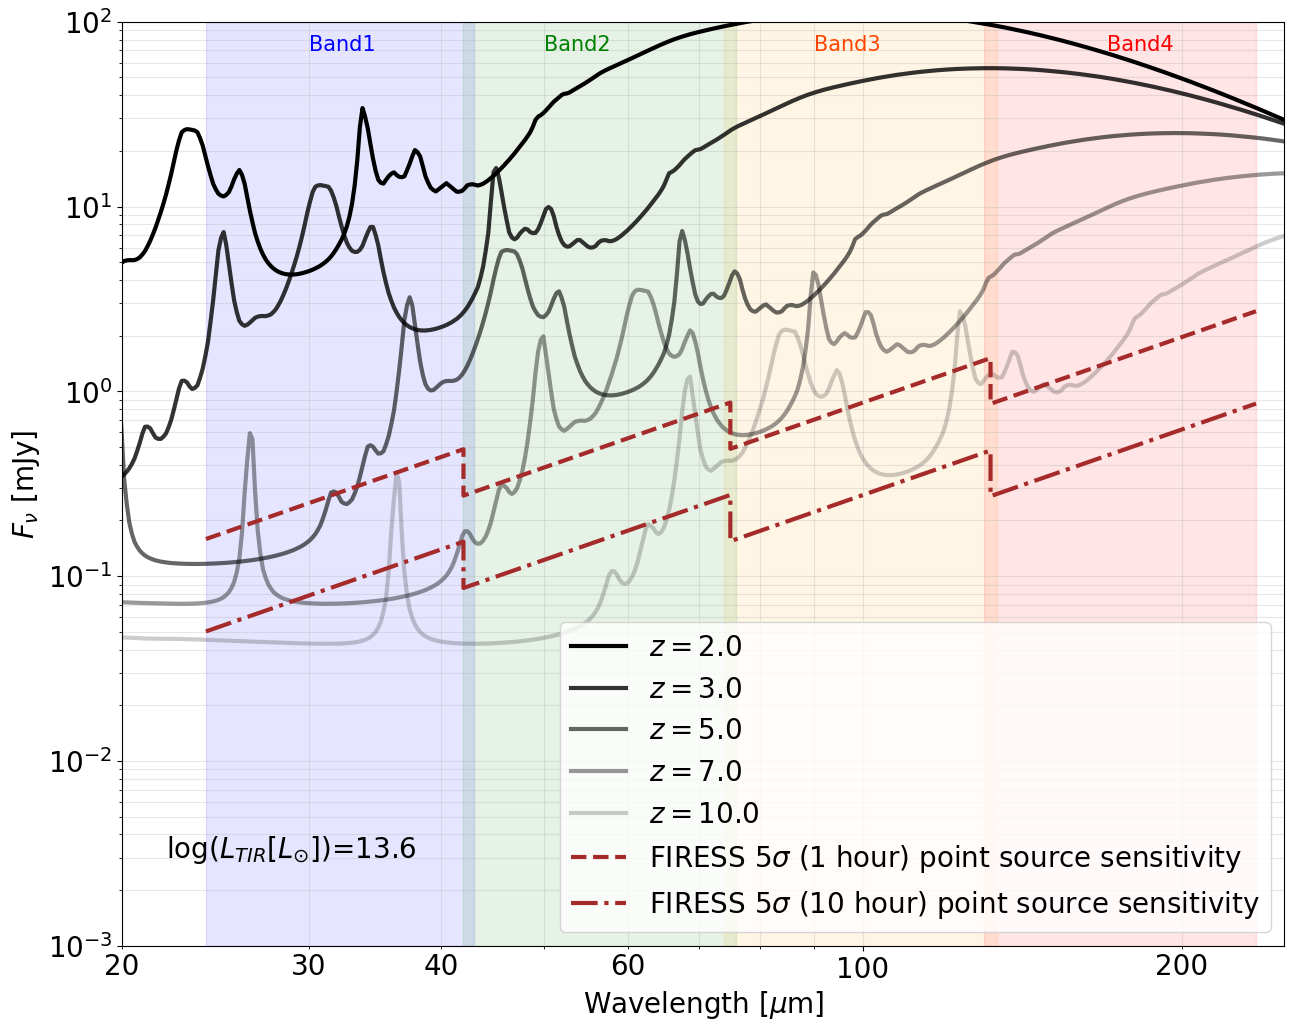

In [184]:
fig,ax=plt.subplots(figsize=(15,12))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'$F_{\nu}$ '+r'[mJy]',fontsize=20)

plt.xlim(20,250)
#use 1e-2,1e2 if N>1e23
#plt.ylim(1e-2,1e2)
plt.ylim(1e-3,1e2)

plt.axvspan(24,43,alpha=0.1,color='blue')
plt.axvspan(42,76,alpha=0.1,color='green')
plt.axvspan(74,134,alpha=0.1,color='orange')
plt.axvspan(130,235,alpha=0.1,color='red')

#instead of 7, use 70 if N>e23)
plt.annotate(xy=(30,70),text='Band1',fontsize=15, color='blue')
plt.annotate(xy=(50,70),text='Band2',fontsize=15, color='green')
plt.annotate(xy=(90,70),text='Band3',fontsize=15, color='orangered')
plt.annotate(xy=(170,70),text='Band4',fontsize=15, color='red')
#
plt.grid(alpha=0.3, which='both')
plt.annotate(xy=(100,3e-9),text=r'$log(N_H [cm^{-2}])=$'+str(np.round(np.log10(np.mean(Ncol)),2)),fontsize=20)
plt.annotate(xy=(100,1e-9),text=r'$\ell=$'+str(size)+'kpc',fontsize=20) 
plt.annotate(xy=(60,1e-10),text=r'$z=$'+str(redshift),fontsize=20)
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 1))
ax.get_xaxis().set_minor_formatter(formatter)
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 1))
ax.get_xaxis().set_major_formatter(formatter)
size=2.0
nden=len(logU)
myalpha=[1.0,0.8,0.6,0.4,0.2]
saveflux=[]
for i, myz in enumerate(redshift):
    sed=np.zeros(len(wave_interp))
    pahspec=np.zeros(len(wave_interp))
    stellar=np.zeros(len(wave_interp))
    LTIR=0.0
    for j, myu in enumerate(logU):
        idx=np.where(uval-myu<0.5)[0]
        id1=idx[-1]
        id0=idx[-2]
        logU1=uval[idx[-1]]
        logU0=uval[idx[-2]]
        filename1=files[id1]
        filename0=files[id0]
        wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
        wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

        wave0=wave0*(1+myz)
        wave1=wave1*(1+myz)
        flux0=np.pi/4.0*size**2/(4*np.pi*dL[i].value*dL[i].value*1e6)*Ncol[j]*(jtot0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
        flux1=np.pi/4.0*size**2/(4*np.pi*dL[i].value*dL[i].value*1e6)*Ncol[j]*(jtot1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

        sflux0_Jy=np.pi*size**2/(4*np.pi*dL[i].value*dL[i].value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
        sflux1_Jy=np.pi*size**2/(4*np.pi*dL[i].value*dL[i].value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
    
        flux0intp=np.interp(wave_interp,wave0,flux0)
        flux1intp=np.interp(wave_interp,wave1,flux1)
    
        sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
        sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
        sed0=flux0intp+sflux0intp
        sed1=flux1intp+sflux1intp

        pahspec=pahspec+(flux0intp*(10**logU1-10**myu)+flux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)    
        stellar=stellar+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
        sed=sed+(sed0*(10**logU1-10**myu)+sed1*(10**myu-10**logU0))/(10**logU1-10**logU0)

    
        Lir_data0=np.loadtxt(filename0, dtype=str,skiprows=4, max_rows=1)
        LTIR0=float(Lir_data0[0])
        LTIR0=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR0*Ncol[j])/(3.8e33)
        Lir_data1=np.loadtxt(filename1, dtype=str,skiprows=4, max_rows=1)
        LTIR1=float(Lir_data1[0])
        LTIR1=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR1*Ncol[j])/(3.8e33)
        LTIR=LTIR+((LTIR0*(10**logU1-10**myu)+LTIR1*(10**myu-10**logU0))/(10**logU1-10**logU0))
#
    pahspec=pahspec/float(nden)
    stellar=stellar/float(nden)
    sed=sed/float(nden)
    LTIR=LTIR/float(nden)
    saveflux.append(sed)
    
    print(np.log10(LTIR))
    plt.plot(wave_interp,sed*1e3,linewidth=3,color='black',label=r'$z=$'+str(myz),alpha=myalpha[i])

plt.annotate(xy=(22,0.003),text=r'log($L_{TIR}$[$L_{\odot}$])='+str(np.round(np.log10(LTIR),2)),fontsize=20)
plt.plot(sensi_wave,np.array(sensi_flux)*1e3,linewidth=3,linestyle='--',color='brown',label=r'FIRESS 5$\sigma$ (1 hour) point source sensitivity')
plt.plot(sensi_wave,np.array(sensi_flux/np.sqrt(10.0))*1e3,linewidth=3,linestyle='-.',color='brown',label=r'FIRESS 5$\sigma$ (10 hour) point source sensitivity')
plt.legend(loc=4,prop={'size':20})
#plt.savefig('FIRESS_N1e22.png',dpi=600)
#plt.savefig('FIRESS_N2.5e22.png',dpi=600)
#plt.savefig('FIRESS_N1e23.png',dpi=600)
plt.savefig('FIRESS_N1e23_v2.png',dpi=600)
#plt.savefig('FIRESS_N2e23.png',dpi=600)
plt.show()

In [153]:
size=2.0
nden=len(logU)
myalpha=[1.0,0.8,0.6,0.4,0.2]
saveflux_low=[]
saveflux_med=[]
saveflux_std=[]
qPAH_val=[3.8,1.8,0.5]
Uavg=np.mean(U)
#redshift: 3,5,7,10
#myz=10.0
#myz=7.0
#myz=5.0
myz=3.0

mycosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dL=mycosmo.luminosity_distance(myz)

#   compute line ratio
log_uval_qpah=np.log10(uval_qpah)
idx=np.where(log_uval_qpah-np.log10(Uavg)<1.0)[0]
id1=idx[-1]
id0=idx[-2]
logU1=log_uval_qpah[idx[-1]]
logU0=log_uval_qpah[idx[-2]]
filename1=filelist[id1]
filename0=filelist[id0]
wave,emiss_norm=np.loadtxt(filename0[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio0=[]
for i, file in enumerate(filename0):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio0.append(emiss/emiss_norm)
wave,emiss_norm=np.loadtxt(filename1[5], unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
ratio1=[]
for i, file in enumerate(filename1):
    wave,emiss=np.loadtxt(file, unpack=True, usecols=(0,1),skiprows=61) #jpah [erg/s per H]
    ratio1.append(emiss/emiss_norm) 


#qPAH try: 0.5%: ratio[0]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[0]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[0]))
qPAH_low=(ratio0intp*(10**logU1-10**logUavg)+ratio1intp*(10**logUavg-10**logU0))/(10**logU1-10**logU0)

#qPAH try: 1.8%: ratio[2]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[2]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[2]))
qPAH_med=(ratio0intp*(10**logU1-10**logUavg)+ratio1intp*(10**logUavg-10**logU0))/(10**logU1-10**logU0)

#qPAH try: 3.8%: ratio[2]
ratio0intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio0[5]))
ratio1intp=np.interp(wave_interp,np.flip(wave*(1+myz)),np.flip(ratio1[5]))
qPAH_std=(ratio0intp*(10**logU1-10**logUavg)+ratio1intp*(10**logUavg-10**logU0))/(10**logU1-10**logU0)


sed_std=np.zeros(len(wave_interp))
pahspec_std=np.zeros(len(wave_interp))
stellar_std=np.zeros(len(wave_interp))
sed_low=np.zeros(len(wave_interp))
pahspec_low=np.zeros(len(wave_interp))
stellar_low=np.zeros(len(wave_interp))
sed_med=np.zeros(len(wave_interp))
pahspec_med=np.zeros(len(wave_interp))
stellar_med=np.zeros(len(wave_interp))
LTIR=0.0
    
for j, myu in enumerate(logU):
    idx=np.where(uval-myu<0.5)[0]
    id1=idx[-1]
    id0=idx[-2]
    logU1=uval[idx[-1]]
    logU0=uval[idx[-2]]
    filename1=files[id1]
    filename0=files[id0]
    wave0,jtot0,jdust0,jpahi0,jpahn0=np.loadtxt(filename0, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]
    wave1,jtot1,jdust1,jpahi1,jpahn1=np.loadtxt(filename1, unpack=True, usecols=(0,1,2,3,4),skiprows=7) #jpah [erg/s per H]

    wave0=wave0*(1+myz)
    wave1=wave1*(1+myz)
    flux0_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[j]*(jdust0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_dust=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[j]*(jdust1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2

    flux0_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[j]*(jpahi0+jpahn0)/(cspeed/(wave0/1e4))/(1e-23) #now Jy
    flux1_pah=np.pi/4.0*size**2/(4*np.pi*dL.value*dL.value*1e6)*Ncol[j]*(jpahi1+jpahn1)/(cspeed/(wave1/1e4))/(1e-23) #now Jy  #erg/s/cm^2
        
    sflux0_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU0)
    sflux1_Jy=np.pi*size**2/(4*np.pi*dL.value*dL.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+myz)/1e4))/(1e-23)*(10**logU1)
        
    flux0intp_std=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_std
    flux1intp_std=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_std
    flux0intp_low=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_low
    flux1intp_low=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_low
    flux0intp_med=np.interp(wave_interp,wave0,flux0_dust)+np.interp(wave_interp,wave0,flux0_pah)*qPAH_med
    flux1intp_med=np.interp(wave_interp,wave1,flux1_dust)+np.interp(wave_interp,wave1,flux1_pah)*qPAH_med

    sflux0intp=np.interp(wave_interp,swave*(1+myz),sflux0_Jy)
    sflux1intp=np.interp(wave_interp,swave*(1+myz),sflux1_Jy)
    
    sed0_std=flux0intp_std+sflux0intp
    sed1_std=flux1intp_std+sflux1intp

    sed0_low=flux0intp_low+sflux0intp
    sed1_low=flux1intp_low+sflux1intp
    
    sed0_med=flux0intp_med+sflux0intp
    sed1_med=flux1intp_med+sflux1intp

    pahspec_std=pahspec_std+(flux0intp_std*(10**logU1-10**myu)+flux1intp_std*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_low=pahspec_low+(flux0intp_low*(10**logU1-10**myu)+flux1intp_low*(10**myu-10**logU0))/(10**logU1-10**logU0)
    pahspec_med=pahspec_med+(flux0intp_med*(10**logU1-10**myu)+flux1intp_med*(10**myu-10**logU0))/(10**logU1-10**logU0)
    
    stellar_std=stellar_std+(sflux0intp*(10**logU1-10**myu)+sflux1intp*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_std=sed_std+(sed0_std*(10**logU1-10**myu)+sed1_std*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_low=sed_low+(sed0_low*(10**logU1-10**myu)+sed1_low*(10**myu-10**logU0))/(10**logU1-10**logU0)
    sed_med=sed_med+(sed0_med*(10**logU1-10**myu)+sed1_med*(10**myu-10**logU0))/(10**logU1-10**logU0)

#
stellar_std=stellar_std/float(nden)
pahspec_std=pahspec_std/float(nden)
sed_std=sed_std/float(nden)
pahspec_low=pahspec_low/float(nden)
sed_low=sed_low/float(nden)
pahspec_med=pahspec_med/float(nden)
sed_med=sed_med/float(nden)
#sed_z10=[sed_std,sed_med,sed_low]
#sed_z7=[sed_std,sed_med,sed_low]
#sed_z5=[sed_std,sed_med,sed_low]
sed_z3=[sed_std,sed_med,sed_low]

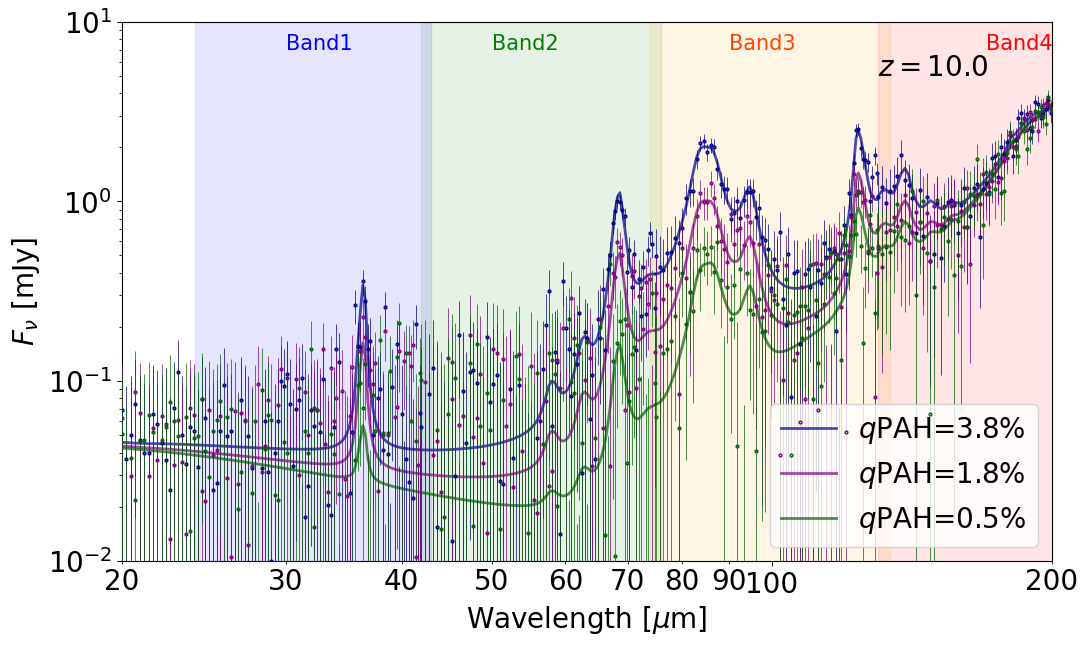

In [198]:
myz=10.0
fluxall=sed_z10
#filename=["spec_qpah3.8_z7.0.txt","spec_qpah1.8_z7.0.txt","spec_qpah0.5_z7.0.txt"]
filename=["spec_qpah3.8_z10.0_Jy.txt","spec_qpah1.8_z10.0_Jy.txt","spec_qpah0.5_z10.0_Jy.txt"]

fig,ax=plt.subplots(figsize=(12,7))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.axvspan(24,43,alpha=0.1,color='blue',zorder=0)
plt.axvspan(42,76,alpha=0.1,color='green',zorder=0)
plt.axvspan(74,134,alpha=0.1,color='orange',zorder=0)
plt.axvspan(130,235,alpha=0.1,color='red',zorder=0)

plt.annotate(xy=(30,7),text='Band1',fontsize=15, color='blue')
plt.annotate(xy=(50,7),text='Band2',fontsize=15, color='green')
plt.annotate(xy=(90,7),text='Band3',fontsize=15, color='orangered')
plt.annotate(xy=(170,7),text='Band4',fontsize=15, color='red')

plt.annotate(xy=(130,5.0),text=r'$z=$'+str(myz),fontsize=20)

plt.xlim(20,200)
#plt.xlim(20,250)
#plt.ylim(5e-2,5e1)
plt.ylim(1e-2,1e1)
plt.xscale('log')
plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'$F_{\nu}$ '+r'[mJy]',fontsize=20)
plt.yscale('log')
#plt.savefig('PAH_simulated_spectrum_Lir12.44_z3.5.png',dpi=600)

#simulate noise added spectrum for z=3,5,7,10 
sensi=1.9e-16/(cspeed/(wave_interp/1e4))/(1e-23) #now Jy
sigma=sensi/5.0
idband1=np.where((wave_interp>20) & (wave_interp<42))
idband2=np.where((wave_interp>=42) & (wave_interp<75))
idband3=np.where((wave_interp>=75) & (wave_interp<130))
idband4=np.where((wave_interp>=130) & (wave_interp<250))

band1wave=np.arange(20.0,42,0.23)
band1rms=np.zeros(len(band1wave))
band2wave=np.arange(42.0,75.0,0.41)
band2rms=np.zeros(len(band2wave))
band3wave=np.arange(75.0,130,0.73)
band3rms=np.zeros(len(band3wave))
band4wave=np.arange(130.0,250,1.29)
band4rms=np.zeros(len(band4wave))

#convolution function for channel response: Gaussian with FWHM
#Band 1: 1.86e-1 micron
#Band 2: 4.27e-1 micron
#Band 3: 7.61e-1 micron
#Band 4: 1.32e+0 micron

sigma1=1.86e-1/2.355
sigma2=4.27e-1/2.355
sigma3=7.61e-1/2.355
sigma4=1.32e+0/2.355


#mystyle=[':','-','--']
mystyle=['-','-','-']
#mycolor=['red','blue','green']
mycolor=['darkblue','purple','darkgreen']
for i in range(3):
    flux_Jy=fluxall[i]
    band1spw=np.interp(band1wave,wave_interp[idband1],flux_Jy[idband1])
    band1spwc=scipy.ndimage.gaussian_filter1d(band1spw,sigma=sigma1)
    band1addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band1wave))
    band1rms=np.zeros(len(band1wave))+band1addrms
    band1rms=band1rms/(cspeed/(band1wave/1e4)/(band1wave/1e4)*(0.23/1e4))

    band2spw=np.interp(band2wave,wave_interp[idband2],flux_Jy[idband2])
    band2spwc=scipy.ndimage.gaussian_filter1d(band2spw,sigma=sigma2)
    band2addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band2wave))
    band2rms=np.zeros(len(band2wave))+band2addrms
    band2rms=band2rms/(cspeed/(band2wave/1e4)/(band2wave/1e4)*(0.41/1e4))

    band3spw=np.interp(band3wave,wave_interp[idband3],flux_Jy[idband3])
    band3spwc=scipy.ndimage.gaussian_filter1d(band3spw,sigma=sigma3)
    band3addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band3wave))
    band3rms=np.zeros(len(band3wave))+band3addrms
    band3rms=band3rms/(cspeed/(band3wave/1e4)/(band3wave/1e4)*(0.73/1e4))

    band4spw=np.interp(band4wave,wave_interp[idband4],flux_Jy[idband4])
    band4spwc=scipy.ndimage.gaussian_filter1d(band4spw,sigma=sigma4)
    band4addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band4wave))
    band4rms=np.zeros(len(band4wave))+band4addrms
    band4rms=band4rms/(cspeed/(band4wave/1e4)/(band4wave/1e4)*(1.29/1e4))
    
    plt.errorbar(band1wave,(band1spwc+band1rms)*1e3,yerr=np.std(band1rms)*1e3,marker='o',zorder=5,markersize=2.0,markerfacecolor='none',markeredgecolor=mycolor[i],ecolor=mycolor[i],linewidth=0,elinewidth=0.5)
    plt.errorbar(band2wave,(band2spwc+band2rms)*1e3,yerr=np.std(band2rms)*1e3,marker='o',zorder=5,markersize=2.0,markerfacecolor='none',markeredgecolor=mycolor[i],ecolor=mycolor[i],linewidth=0,elinewidth=0.5)
    plt.errorbar(band3wave,(band3spwc+band3rms)*1e3,yerr=np.std(band3rms)*1e3,marker='o',zorder=5,markersize=2.0,markerfacecolor='none',markeredgecolor=mycolor[i],ecolor=mycolor[i],linewidth=0,elinewidth=0.5)
    plt.errorbar(band4wave,(band4spwc+band4rms)*1e3,yerr=np.std(band4rms)*1e3,marker='o',zorder=5,markersize=2.0,markerfacecolor='none',markeredgecolor=mycolor[i],ecolor=mycolor[i],linewidth=0,elinewidth=0.5)
    
    #plt.step(band2wave,(band2spw+band2rms)*1e3,color=mycolor[i],linewidth=1)
    #plt.step(band3wave,(band3spw+band3rms)*1e3,color=mycolor[i],linewidth=1)
    #plt.step(band4wave,(band4spw+band4rms)*1e3,color=mycolor[i],linewidth=1)

    plt.plot(band1wave,band1spw*1e3,color=mycolor[i],alpha=0.7,linewidth=2.0,zorder=4,linestyle=mystyle[i])
    plt.plot(band2wave,band2spw*1e3,color=mycolor[i],alpha=0.7,linewidth=2.0,zorder=4,linestyle=mystyle[i])
    plt.plot(band3wave,band3spw*1e3,color=mycolor[i],alpha=0.7,linewidth=2.0,zorder=4,linestyle=mystyle[i])
    plt.plot(band4wave,band4spw*1e3,color=mycolor[i],alpha=0.7,linewidth=2.0,zorder=4,linestyle=mystyle[i],label=r'$q$PAH='+str(qPAH_val[i])+'%')

    #print file
    wave=np.array(list(band1wave)+list(band2wave)+list(band3wave)+list(band4wave))
    flux=np.array(list(band1spw+band1rms)+list(band2spw+band2rms)+list(band3spw+band3rms)+list(band4spw+band4rms))
    error1=np.zeros(len(band1wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band1wave/1e4)/(band1wave/1e4)*(0.23/1e4))
    error2=np.zeros(len(band2wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band2wave/1e4)/(band2wave/1e4)*(0.41/1e4))
    error3=np.zeros(len(band3wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band3wave/1e4)/(band3wave/1e4)*(0.73/1e4))
    error4=np.zeros(len(band4wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band4wave/1e4)/(band4wave/1e4)*(1.29/1e4))
    error=np.array(list(error1)+list(error2)+list(error3)+list(error4))
    

    f = open(filename[i], "w")
    for i in range(len(wave)):
        #f.write(str(wave[i])+' '+str(flux[i]*1e6)+' '+str(error[i]*1e6)+'\n')
        f.write(str(wave[i])+' '+str(flux[i])+' '+str(error[i])+'\n')
    f.close()

plt.minorticks_on()
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 1))
ax.get_xaxis().set_minor_formatter(formatter)
formatter = LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 1))
ax.get_xaxis().set_major_formatter(formatter)


plt.legend(loc=4,prop={'size':20})
plt.savefig('PAH_simulated_spectrum_LIR13.6_z10.0.png',dpi=600)
plt.show()

10.943929785931454


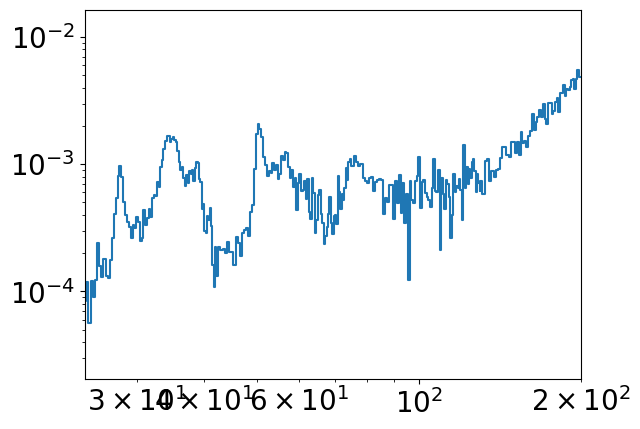

In [224]:
file='pahspec.out_mmpisrf_1.50_st_std'
#file='pahspec.out_mmpisrf_2.50_st_std'
#file='pahspec.out_mmpisrf_3.50_st_std'
#file='pahspec.out_mmpisrf_4.50_st_std'
#file='pahspec.out_mmpisrf_5.50_st_std'
#file='pahspec.out_mmpisrf_6.50_st_std'

logU=1.5
size=2.0
norm=100.0
redshift=3.5
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
dlum=cosmo.luminosity_distance(redshift)
Lir_data=np.loadtxt(file, dtype=str,skiprows=4, max_rows=1)
LTIR=float(Lir_data[0])
LTIR=(np.pi/4.0*(size*1e3*3.085e18)**2*LTIR*Ncol)/(3.8e33)
LIR=(np.log10(LTIR))
print(LIR)

waver,jpah=loadtxt(file, unpack=True, usecols=(0,1),skiprows=7) #jpah [erg/s per H]
wave=waver*(1+redshift)
cspeed=2.99792458e10
Ncol=1e23
size=2.0
flux=np.pi/4.0*size**2/(4*np.pi*dlum.value*dlum.value*1e6)*Ncol*jpah
dflux_Jy=flux/(cspeed/(wave/1e4))/(1e-23) #now Jy
sflux_Jy=np.pi*size**2/(4*np.pi*dlum.value*dlum.value*1e6)*(sflux0)*cspeed/(cspeed/(swave*(1+redshift)/1e4))/(1e-23)*(10**logU)
flux_dust=np.interp(wave_interp,wave,dflux_Jy)
flux_star=np.interp(wave_interp,swave*(1+redshift),sflux_Jy)
flux_Jy=flux_dust+flux_star
##
sensi=1.9e-16/(cspeed/(wave/1e4))/(1e-23) #now Jy
sigma=sensi/5.0
idband1=np.where((wave_interp>20) & (wave_interp<42))
idband2=np.where((wave_interp>=42) & (wave_interp<75))
idband3=np.where((wave_interp>=75) & (wave_interp<130))
idband4=np.where((wave_interp>=130) & (wave_interp<250))

band1wave=np.arange(20.0,42,0.23)
band1rms=np.zeros(len(band1wave))
band2wave=np.arange(42.0,75.0,0.41)
band2rms=np.zeros(len(band2wave))
band3wave=np.arange(75.0,130,0.73)
band3rms=np.zeros(len(band3wave))
band4wave=np.arange(130.0,250,1.29)
band4rms=np.zeros(len(band4wave))

#convolution function for channel response: Gaussian with FWHM
#Band 1: 1.86e-1 micron
#Band 2: 4.27e-1 micron
#Band 3: 7.61e-1 micron
#Band 4: 1.32e+0 micron

sigma1=1.86e-1/2.355
sigma2=4.27e-1/2.355
sigma3=7.61e-1/2.355
sigma4=1.32e+0/2.355

band1spw=np.interp(band1wave,wave_interp[idband1],flux_Jy[idband1])*norm
band1spwc=scipy.ndimage.gaussian_filter1d(band1spw,sigma=sigma1)
band1addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band1wave))
band1rms=np.zeros(len(band1wave))+band1addrms
band1rms=band1rms/(cspeed/(band1wave/1e4)/(band1wave/1e4)*(0.23/1e4))

band2spw=np.interp(band2wave,wave_interp[idband2],flux_Jy[idband2])*norm
band2spwc=scipy.ndimage.gaussian_filter1d(band2spw,sigma=sigma2)
band2addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band2wave))
band2rms=np.zeros(len(band2wave))+band2addrms
band2rms=band2rms/(cspeed/(band2wave/1e4)/(band2wave/1e4)*(0.41/1e4))

band3spw=np.interp(band3wave,wave_interp[idband3],flux_Jy[idband3])*norm
band3spwc=scipy.ndimage.gaussian_filter1d(band3spw,sigma=sigma3)
band3addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band3wave))
band3rms=np.zeros(len(band3wave))+band3addrms
band3rms=band3rms/(cspeed/(band3wave/1e4)/(band3wave/1e4)*(0.73/1e4))

band4spw=np.interp(band4wave,wave_interp[idband4],flux_Jy[idband4])*norm
band4spwc=scipy.ndimage.gaussian_filter1d(band4spw,sigma=sigma4)
band4addrms=np.random.normal(0.0,1.9e-16/1e-23/5.0,len(band4wave))
band4rms=np.zeros(len(band4wave))+band4addrms
band4rms=band4rms/(cspeed/(band4wave/1e4)/(band4wave/1e4)*(1.29/1e4))

#####
wave_firess=np.array(list(band1wave)+list(band2wave)+list(band3wave)+list(band4wave))
#flux_firess=np.array(list(band1spw+band1rms)+list(band2spw+band2rms)+list(band3spw+band3rms)+list(band4spw+band4rms))
flux_firess=np.array(list(band1spwc+band1rms)+list(band2spwc+band2rms)+list(band3spwc+band3rms)+list(band4spwc+band4rms))

error1=np.zeros(len(band1wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band1wave/1e4)/(band1wave/1e4)*(0.23/1e4))
error2=np.zeros(len(band2wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band2wave/1e4)/(band2wave/1e4)*(0.41/1e4))
error3=np.zeros(len(band3wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band3wave/1e4)/(band3wave/1e4)*(0.73/1e4))
error4=np.zeros(len(band4wave))+(1.9e-16/1e-23)/5.0/(cspeed/(band4wave/1e4)/(band4wave/1e4)*(1.29/1e4))
error_firess=np.array(list(error1)+list(error2)+list(error3)+list(error4))


f = open("spec_U1.5.txt", "w")
#f = open("spec_U2.5.txt", "w")
#f = open("spec_U3.5.txt", "w")
#f = open("spec_U4.5.txt", "w")
#f = open("spec_U5.5.txt", "w")
#f = open("spec_U6.5.txt", "w")
for i in range(len(wave_firess)):
    f.write(str(wave_firess[i])+' '+str(flux_firess[i]*1e6)+' '+str(error_firess[i]*1e6)+'\n')
f.close()

#x,y=np.loadtxt("spec_U6.0z3.5.txt",unpack=True, usecols=(0,1),skiprows=7)
#plt.step(wave_interp,flux_Jy)
plt.step(wave_firess,flux_firess)
#plt.plot(x,y,color='blue')
plt.yscale('log')
plt.xscale('log')
plt.xlim(24,200)
plt.show()

In [225]:
x1,y1=loadtxt("spec_U1.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]
x2,y2=loadtxt("spec_U2.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]
x3,y3=loadtxt("spec_U3.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]
x4,y4=loadtxt("spec_U4.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]
x5,y5=loadtxt("spec_U5.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]
x6,y6=loadtxt("spec_U6.5.txt", unpack=True, usecols=(0,1)) #jpah [erg/s per H]

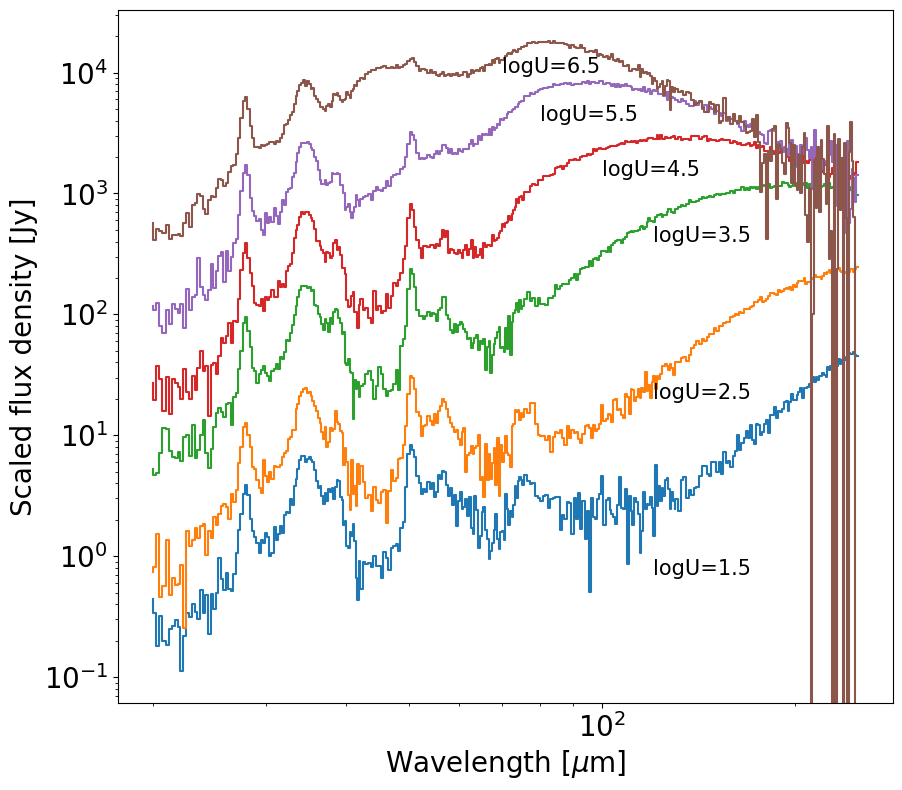

In [228]:
fig,ax=plt.subplots(figsize=(10,9))
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.step(x1,y1*0.3*0.3*0.3*0.15)
plt.step(x2,y2*0.3*0.3*0.15)
plt.step(x3,y3*0.3*0.3)
plt.step(x4,y4*0.3)
plt.step(x5,y5)
plt.step(x6,y6*3)

plt.xlabel(r'Wavelength '+r'[$\mu$m]',fontsize=20)
plt.ylabel(r'Scaled flux density [Jy]',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.annotate(xy=(70,1e4),text='logU=6.5',fontsize=15)
plt.annotate(xy=(80,4e3),text='logU=5.5',fontsize=15)
plt.annotate(xy=(100,1.4e3),text='logU=4.5',fontsize=15)
plt.annotate(xy=(120,4e2),text='logU=3.5',fontsize=15)
plt.annotate(xy=(120,2e1),text='logU=2.5',fontsize=15)
plt.annotate(xy=(120,7e-1),text='logU=1.5',fontsize=15)

plt.savefig('noise_spec_U.png',dpi=600)
plt.show()